# 🌍 Exploratory Data Analysis Roadmap

<div style='background-color:#212121; color:#fff; border-left: 6px solid #1976d2; padding: 18px; font-size: 16px; line-height: 1.7;'>

<b style='color:#1976d2; font-size:18px;'>Project Overview</b>

<ul>

<li>This notebook provides a step-by-step guide for robust exploratory data analysis (EDA) and feature engineering using the <b>Global Country Information Dataset (2023)</b>.</li>

<li>Whether you have a specific goal or are exploring the data for insights, this workflow will help you uncover patterns, relationships, and actionable findings for further analysis or modeling.</li>

</ul>

</div>

## 1. Data Overview

<div style='background-color:#212121; color:#fff; border-left: 6px solid #388e3c; padding: 16px; font-size: 15px; line-height: 1.7;'>

<b style='color:#388e3c; font-size:17px;'>Purpose</b>: Understand the structure and content of the dataset.
<ul>

<li>List all columns, data types, and preview sample records to get a sense of the available features and their formats.</li>

</ul>

</div>

In [1]:
import pandas as pd
# import ydata_profiling as pp
# import sweetviz as sv

df = pd.read_csv('../../data/cleaned/world_data_2023_cleaned.csv')

# # Generate profiling report
# profile = pp.ProfileReport(df, title="World Data 2023 Profiling Report", explorative=True)
# profile.to_file("../../data/cleaned/world_data_2023_profiling_report.html")

# # Generate Sweetviz report
# sweet_report = sv.analyze(df)
# sweet_report.show_html("../../data/cleaned/world_data_2023_sweetviz_report.html")

# List columns, types, and show a sample
print(df.info())
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    195 non-null    object 
 1   density_p_km2                              175 non-null    float64
 2   abbreviation                               188 non-null    object 
 3   agricultural_land_pct                      188 non-null    float64
 4   land_area_km2                              174 non-null    float64
 5   armed_forces_size                          157 non-null    float64
 6   birth_rate                                 169 non-null    float64
 7   calling_code                               194 non-null    float64
 8   capital_major_city                         192 non-null    object 
 9   co2_emissions                              188 non-null    float64
 10  cpi                       

,density_p_km2,agricultural_land_pct,land_area_km2,armed_forces_size,birth_rate,calling_code,co2_emissions,cpi,cpi_change_pct,fertility_rate,...,out_of_pocket_health_expenditure,physicians_per_thousand,population,population:_labor_force_participation_pct,tax_revenue_pct,total_tax_rate,unemployment_rate,urban_population,latitude,longitude
count,175.000000,188.000000,1.740000e+02,157.00000,169.000000,194.000000,1.880000e+02,178.000000,179.000000,188.000000,...,188.000000,168.000000,1.740000e+02,176.000000,169.000000,183.000000,176.000000,1.700000e+02,194.000000,194.000000
mean,136.285714,39.117553,3.439145e+05,89490.44586,19.763018,360.546392,1.777992e+05,190.460955,6.722346,2.698138,...,32.637234,1.696012,1.844273e+07,62.738068,16.573964,40.822404,6.886364,1.064374e+07,19.092351,20.232434
std,137.690927,21.783052,4.773997e+05,128506.34115,8.677308,323.236419,8.387903e+05,397.947380,24.450414,1.282267,...,19.172697,1.353413,2.475196e+07,10.502907,6.961632,20.557662,5.079216,1.458261e+07,23.961779,66.716110
min,7.000000,0.600000,3.490000e+02,1000.00000,8.600000,1.000000,1.100000e+01,99.030000,-4.300000,0.980000,...,0.200000,0.070000,7.714200e+04,38.000000,0.000000,8.000000,0.090000,3.896400e+04,-40.900557,-175.198242
25%,40.000000,21.700000,2.822525e+04,11000.00000,11.780000,82.500000,2.304250e+03,113.885000,1.000000,1.705000,...,17.450000,0.395000,2.384412e+06,56.150000,11.700000,30.600000,3.395000,1.485626e+06,4.544175,-7.941496
50%,89.000000,39.600000,1.195110e+05,29000.00000,17.950000,255.500000,1.230300e+04,125.340000,2.300000,2.245000,...,30.700000,1.460000,8.826588e+06,62.450000,16.300000,37.200000,5.360000,4.678104e+06,17.273849,20.972652
75%,203.000000,55.375000,4.597038e+05,124000.00000,27.070000,506.750000,6.388425e+04,157.265000,4.250000,3.597500,...,43.975000,2.772500,2.570395e+07,69.500000,21.100000,48.000000,9.490000,1.111056e+07,40.124603,48.281523
max,667.000000,82.600000,2.344858e+06,634000.00000,37.910000,1876.000000,9.893038e+06,4583.710000,254.900000,6.910000,...,81.600000,4.620000,1.260140e+08,86.800000,37.200000,219.600000,28.180000,6.432484e+07,64.963051,178.065032


## 2. Summary Statistics & Distribution Visualization

<div style='background-color:#212121; color:#fff; border-left: 6px solid #fbc02d; padding: 16px; font-size: 15px; line-height: 1.7;'>

<b style='color:#fbc02d; font-size:17px;'>Purpose</b>: Explore key statistics and visualize distributions for numeric columns to identify skewness, outliers, and data quality issues.
<ul>

<li>Generate descriptive statistics, histograms, and KDE plots for main features. Use these insights to guide feature engineering and further analysis.</li>

</ul>

</div>

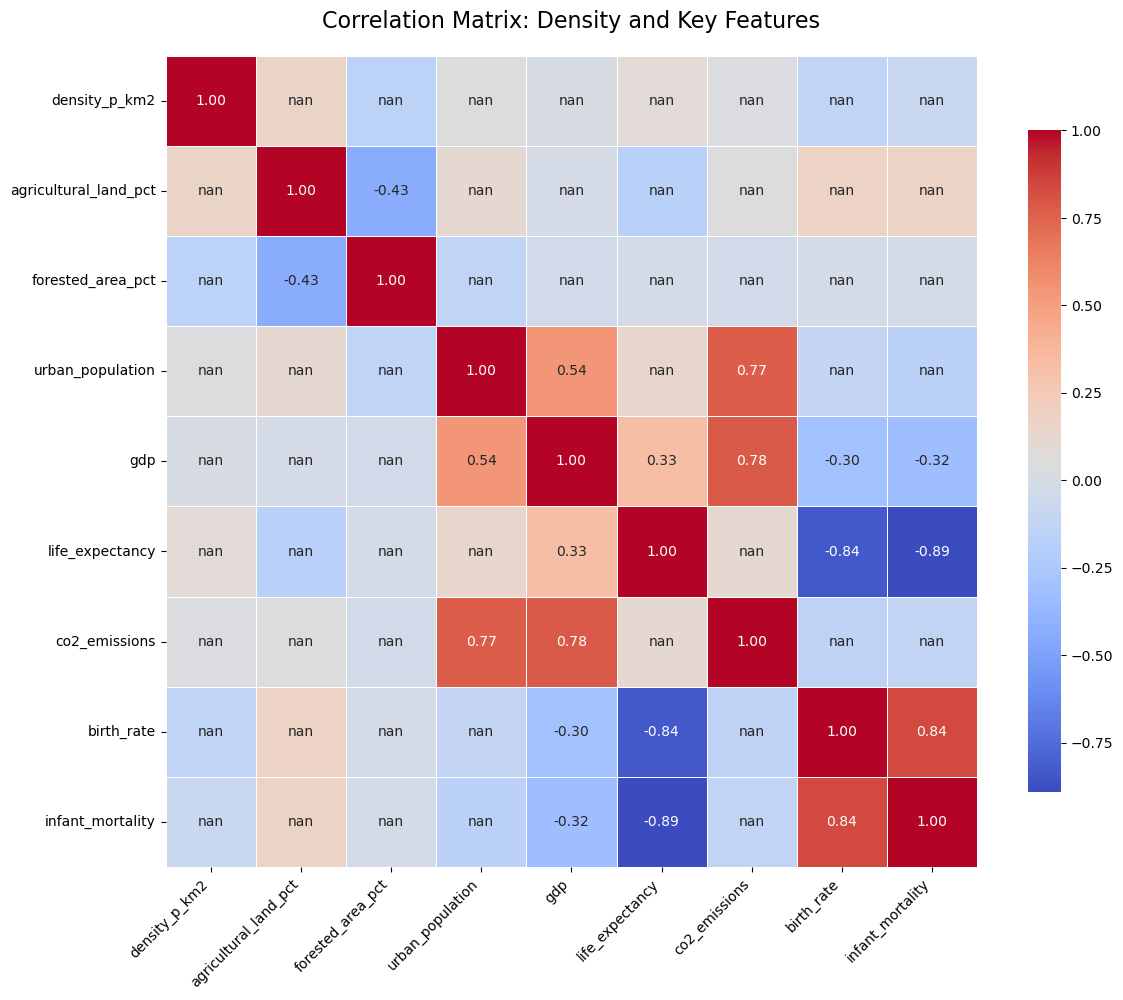

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

PLOT_PATH = "../../results/task-a/plots/"

# Correlation matrix for key features
correlation_columns = [
    'density_p_km2',
    'agricultural_land_pct',
    'forested_area_pct',
    'urban_population',
    'gdp',
    'life_expectancy',
    'co2_emissions',
    'birth_rate',
    'infant_mortality'
]

# Looking at correlations
correlation_matrix = df[correlation_columns].corr()

# Create annotation array with NaN for correlations < 0.3
annot_array = correlation_matrix.values.copy()
for i in range(len(annot_array)):
    for j in range(len(annot_array)):
        if abs(annot_array[i,j]) < 0.3:
            annot_array[i,j] = np.nan


plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=annot_array, cmap='coolwarm', fmt='.2f', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix: Density and Key Features', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(PLOT_PATH + 'correlation_matrix.png', dpi=300)
plt.show()

## 2.1 Key Insights: GDP and Land Use Relationships with Life Expectancy, Birth Rate, and Infant Mortality

<div style='background-color:#212121; color:#fff; border-left: 6px solid #ff9800; padding: 18px; font-size: 16px; line-height: 1.7;'>

<b style='color:#ff9800; font-size:18px;'>Exploratory Data Analysis (EDA) of Global Country Dataset (2023)</b>

<ul>

<li><b style='color:#ffd54f;'>Log Transformation of GDP:</b> Applied <code>np.log1p</code> to GDP to reduce skewness and reveal underlying patterns.</li>

<li><b style='color:#ffd54f;'>Agricultural Land % vs Forested Area %:</b> Clear negative relationship—countries with more agricultural land tend to have less forested area, and vice versa. This highlights land use trade-offs and the presence of countries with little of either (urban/desert nations).</li>

<li><b style='color:#ffd54f;'>GDP vs Life Expectancy:</b> Weak positive trend—higher GDP is generally associated with higher life expectancy, but the relationship is not strong. Other factors (healthcare, education, environment) play significant roles.</li>

<li><b style='color:#ffd54f;'>GDP vs Birth Rate:</b> Weak negative trend—countries with higher GDP tend to have lower birth rates, but the data is scattered, indicating influence from cultural and policy differences.</li>

<li><b style='color:#ffd54f;'>GDP vs Infant Mortality:</b> Strong negative relationship—higher GDP strongly correlates with lower infant mortality rates. Many countries perform better than expected, highlighting the impact of economic development on child health.</li>

</ul>

<b style='color:#ff9800;'>Summary:</b> Log-transforming GDP improves visibility of trends, but only the relationship with infant mortality is strong and clear. Life expectancy and birth rate are influenced by a broader set of factors. Land use analysis reveals important trade-offs between agriculture and forest conservation. These insights demonstrate the importance of combining statistical analysis with domain knowledge for robust EDA.

</div>

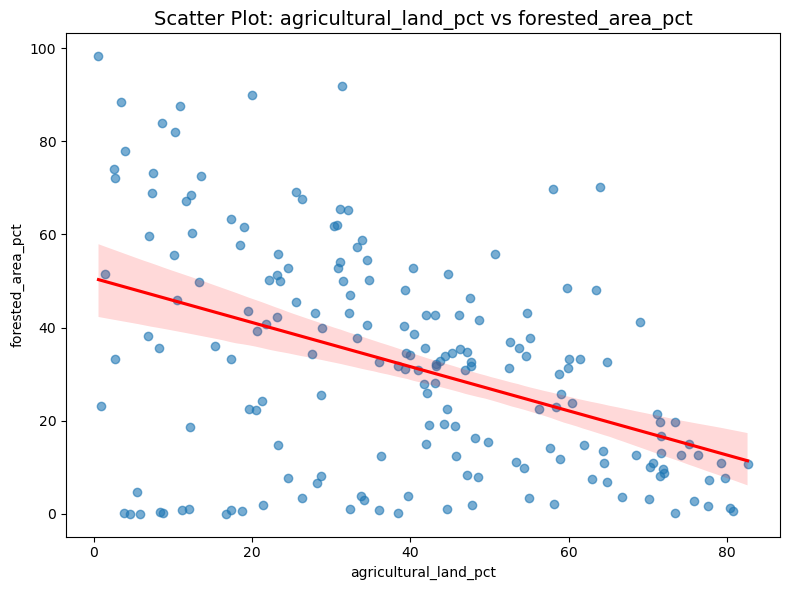

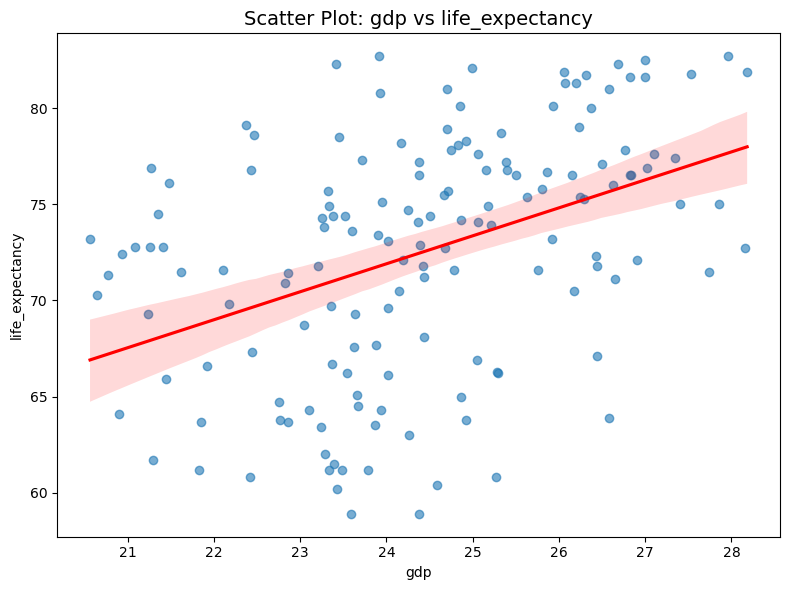

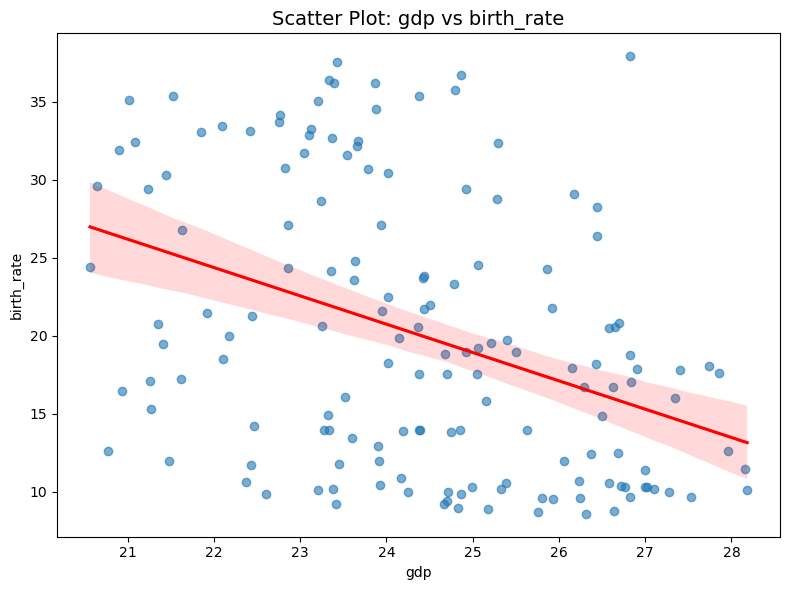

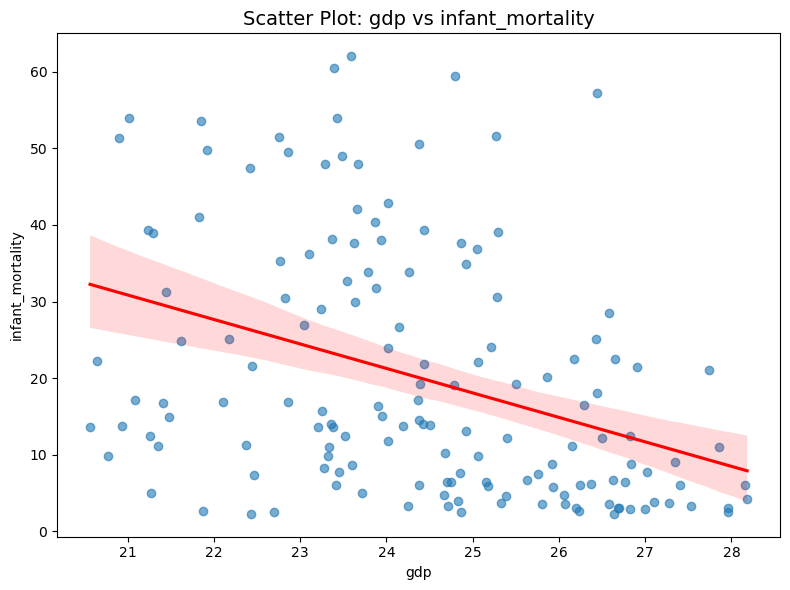

In [3]:
# Scatter plots for weak correlations
weak_corr_pairs = [
    ('agricultural_land_pct', 'forested_area_pct'),
    ('gdp', 'life_expectancy'),
    ('gdp', 'birth_rate'),
    ('gdp', 'infant_mortality')
]

# Build scatter plots
for x_col, y_col in weak_corr_pairs:
    plt.figure(figsize=(8, 6))
    if x_col == 'gdp':
        log_gdp = np.log1p(df['gdp'])
        sns.regplot(x=log_gdp, y=df[y_col], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    else:
        sns.regplot(data=df, x=x_col, y=y_col, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    plt.title(f'Scatter Plot: {x_col} vs {y_col}', fontsize=14)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.tight_layout()
    plt.savefig(PLOT_PATH + f'scatter_{x_col}_vs_{y_col}.png', dpi=300)
    plt.show()  

## 2.2 Key Insights: Strong Correlations in Urbanization, Economy, Environment, and Health

<div style='background-color:#212121; color:#fff; border-left: 6px solid #4caf50; padding: 18px; font-size: 16px; line-height: 1.7;'>

<b style='color:#4caf50; font-size:18px;'>Analysis of Strong Correlations</b>

<ul>

<li><b style='color:#a5d6a7;'>Urban Population vs GDP:</b> After log transformation, the scatter plot reveals a strong positive correlation. Countries with larger urban populations tend to have higher GDP, reflecting the economic impact of urbanization. The log transformation is essential to reduce skewness and clarify the trend.</li>

<li><b style='color:#a5d6a7;'>Urban Population vs CO₂ Emissions:</b> Log-transforming both variables exposes a clear positive relationship. Nations with larger urban populations generally produce more CO₂ emissions, highlighting the environmental consequences of urbanization and industrial activity.</li>

<li><b style='color:#a5d6a7;'>Birth Rate vs Infant Mortality:</b> The original scale scatter plot shows a strong positive correlation. Countries with higher birth rates tend to have higher infant mortality rates, reflecting underlying health and development challenges. No transformation is needed for these variables.</li>

</ul>

<b style='color:#4caf50;'>Summary:</b> These strong correlations illustrate key global patterns: urbanization drives economic growth and environmental impact, while demographic factors are closely linked to health outcomes. Log transformation is crucial for highly skewed variables, but not necessary when the relationship is already clear.

</div>

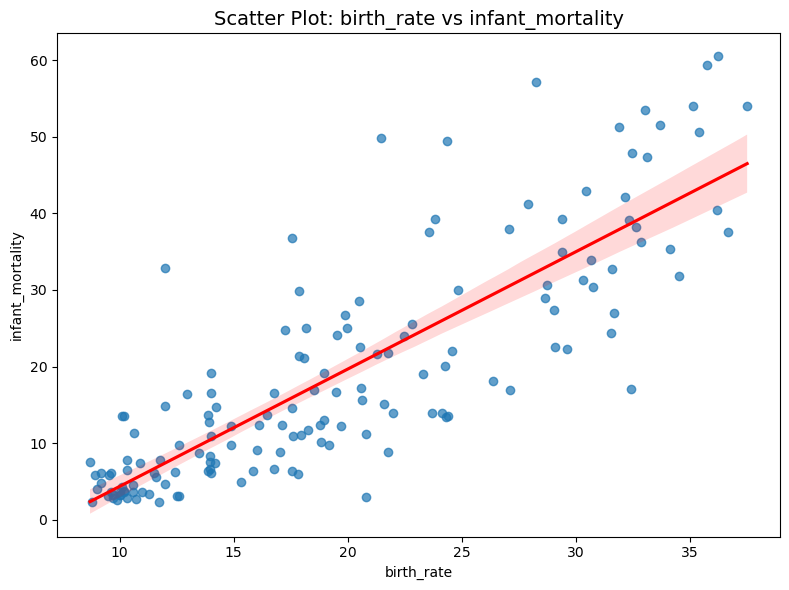

In [4]:
# Scatter plots for strong correlations
strong_corr_pairs = [
    ('birth_rate', 'infant_mortality')
]

# Build scatter plots
for x_col, y_col in strong_corr_pairs:
    plt.figure(figsize=(8,6))
    if x_col =='urban_population' and y_col == 'gdp':
        log_urban = np.log1p(df['urban_population'])
        log_gdp = np.log1p(df['gdp'])
        sns.regplot(x=log_urban, y=log_gdp, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    elif x_col =='urban_population' and y_col == 'co2_emissions':
        log_urban = np.log1p(df['urban_population'])
        log_co2 = np.log1p(df['co2_emissions'])
        sns.regplot(x=log_urban, y=log_co2, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    else:  
        sns.regplot(data=df, x=x_col, y=y_col, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
    plt.title(f'Scatter Plot: {x_col} vs {y_col}', fontsize=14)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.tight_layout()
    plt.savefig(PLOT_PATH + f'scatter_{x_col}_vs_{y_col}.png', dpi=300)
    plt.show()

## 2.3 Next Steps: Deep Dive into Economic and Social Indicators

<div style='background-color:#212121; color:#fff; border-left: 6px solid #1976d2; padding: 18px; font-size: 16px; line-height: 1.7;'>

<b style='color:#1976d2; font-size:18px;'>What to Do Next?</b>

<ul>
<li><b>1. Build a new correlation matrix</b> for the set of economic and social indicators you listed: <br>
<code>cpi, cpi_change_pct, gasoline_price, gdp, gross_primary_education_enrollment_pct, gross_tertiary_education_enrollment_pct, life_expectancy, maternal_mortality_ratio, minimum_wage, out_of_pocket_health_expenditure, physicians_per_thousand, population, unemployment_rate, population:_labor_force_participation_pct, tax_revenue_pct, total_tax_rate</code>.
</li>
<li><b>2. Visualize the new matrix</b> with a heatmap, using the same thresholding technique to highlight strong and weak relationships.</li>
<li><b>3. Interpret the results:</b> Identify clusters of highly correlated features, outliers, and unexpected relationships. Compare these findings to your previous analysis.</li>
<li><b>4. Investigate causality and actionable insights:</b> For strong correlations, consider domain knowledge and possible causal links. For weak or surprising results, hypothesize why and check for data quality issues.</li>
<li><b>5. Feature engineering:</b> Based on your findings, create new features (e.g., ratios, log transforms, interaction terms) that may improve downstream analysis or modeling.</li>
<li><b>6. Document insights:</b> Continue adding professional markdown summaries for each major step, focusing on clarity and impact for your portfolio or CV.</li>
</ul>

<b style='color:#1976d2;'>Why this step?</b> Economic and social indicators often reveal deeper patterns in development, health, and policy. By analyzing their interrelationships, you can uncover drivers of outcomes, spot redundancies, and guide feature selection for predictive modeling.

</div>

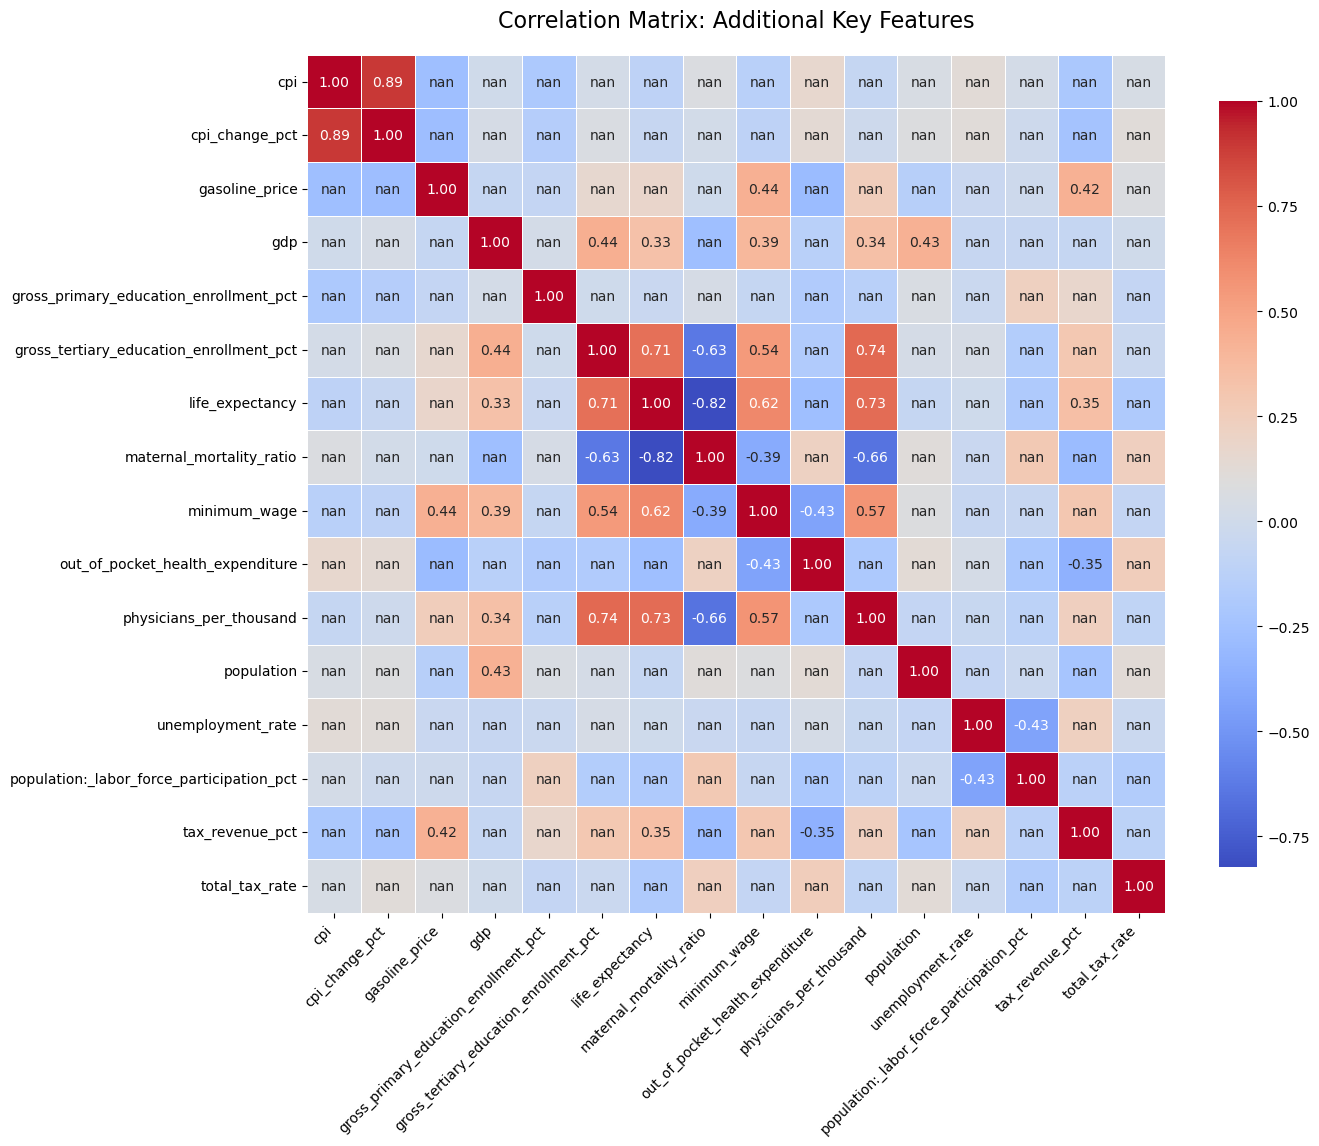

In [5]:
# Correlation matrix for additional key features
correlation_columns = [
    'cpi',
    'cpi_change_pct',
    'gasoline_price',
    'gdp',
    'gross_primary_education_enrollment_pct',
    'gross_tertiary_education_enrollment_pct',
    'life_expectancy',
    'maternal_mortality_ratio',
    'minimum_wage',
    'out_of_pocket_health_expenditure',
    'physicians_per_thousand',
    'population',
    'unemployment_rate',
    'population:_labor_force_participation_pct',
    'tax_revenue_pct',
    'total_tax_rate'
]

# Create annotation array with NaN for correlations < 0.3
annot_array = df[correlation_columns].corr().values.copy()
for i in range(len(annot_array)):
    for j in range(len(annot_array)):
        if abs(annot_array[i,j]) < 0.3:
            annot_array[i,j] = np.nan

# Looking at correlations
correlation_matrix = df[correlation_columns].corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=annot_array, cmap='coolwarm', fmt='.2f', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix: Additional Key Features', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(PLOT_PATH + 'correlation_matrix_economic_social.png', dpi=300)

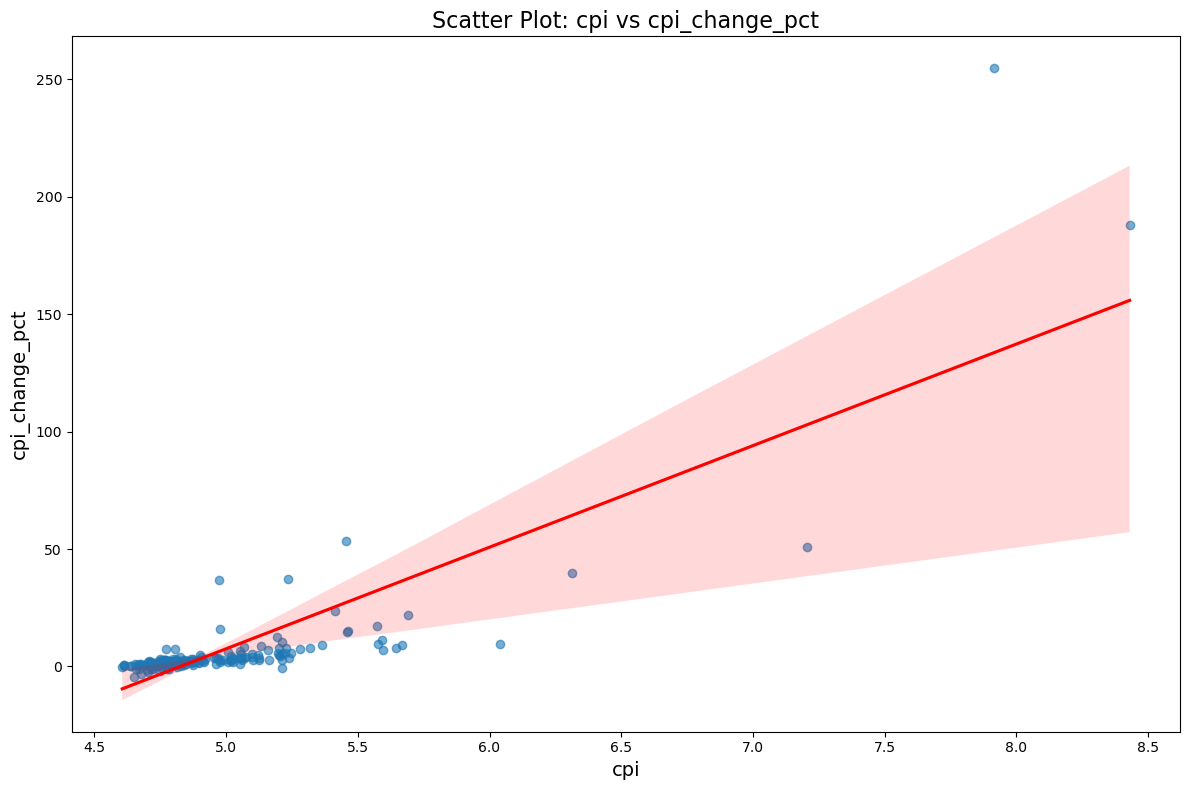

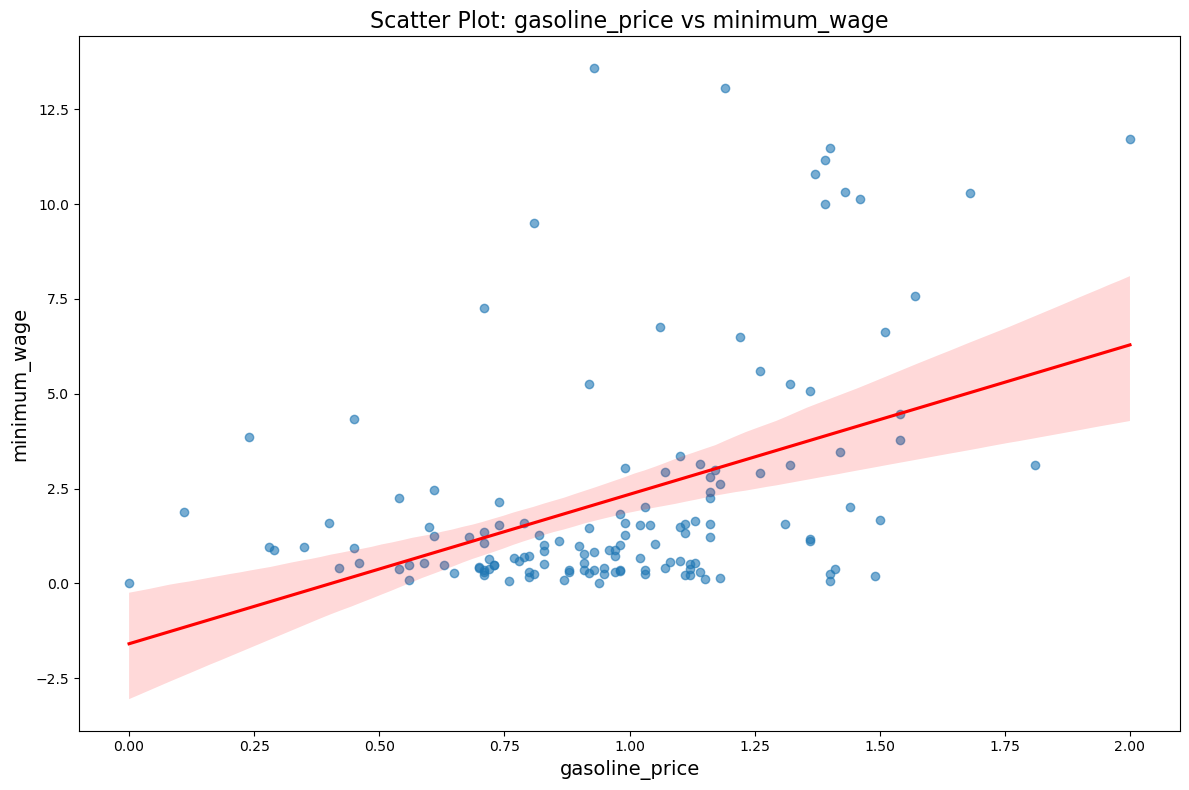

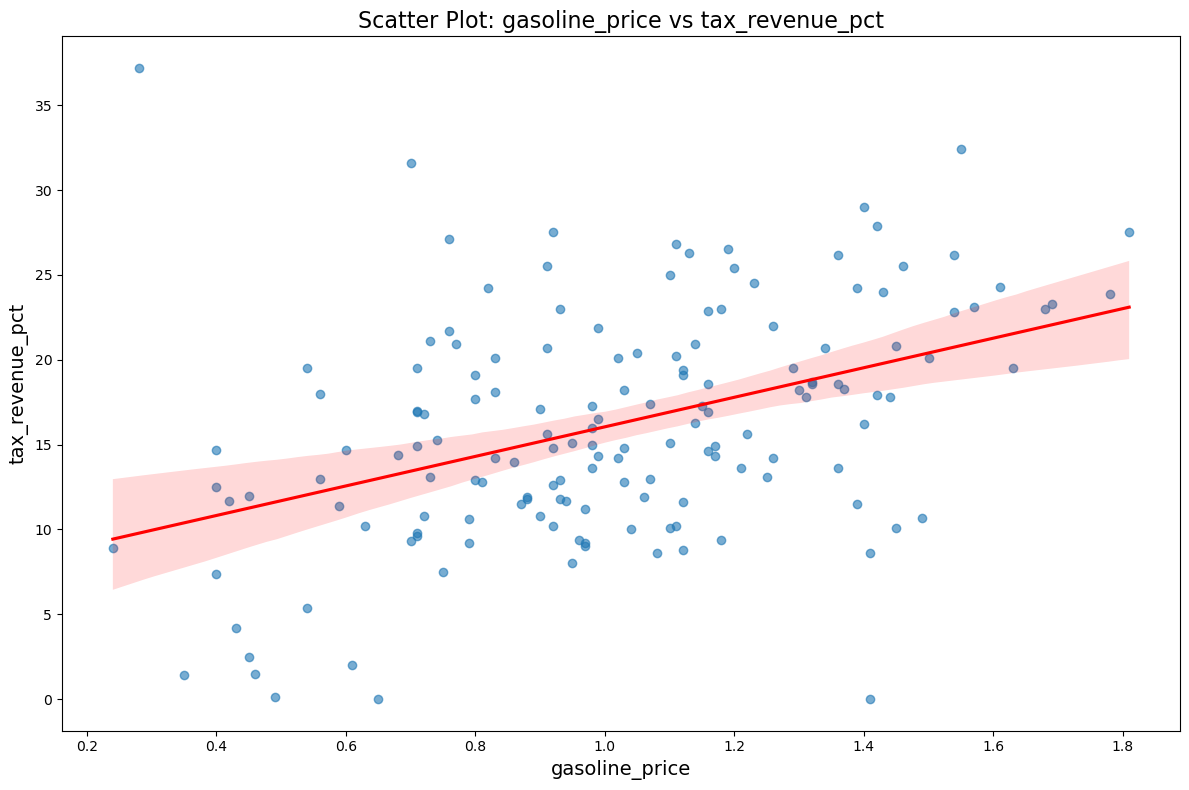

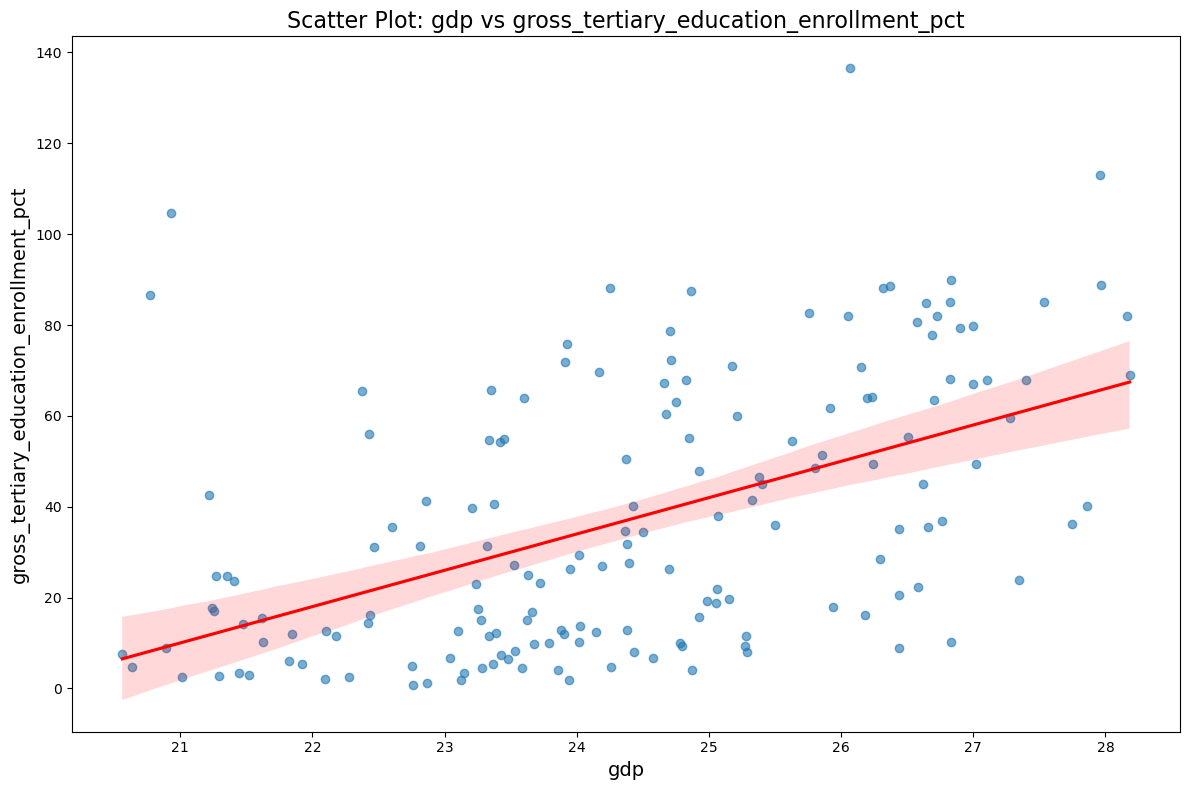

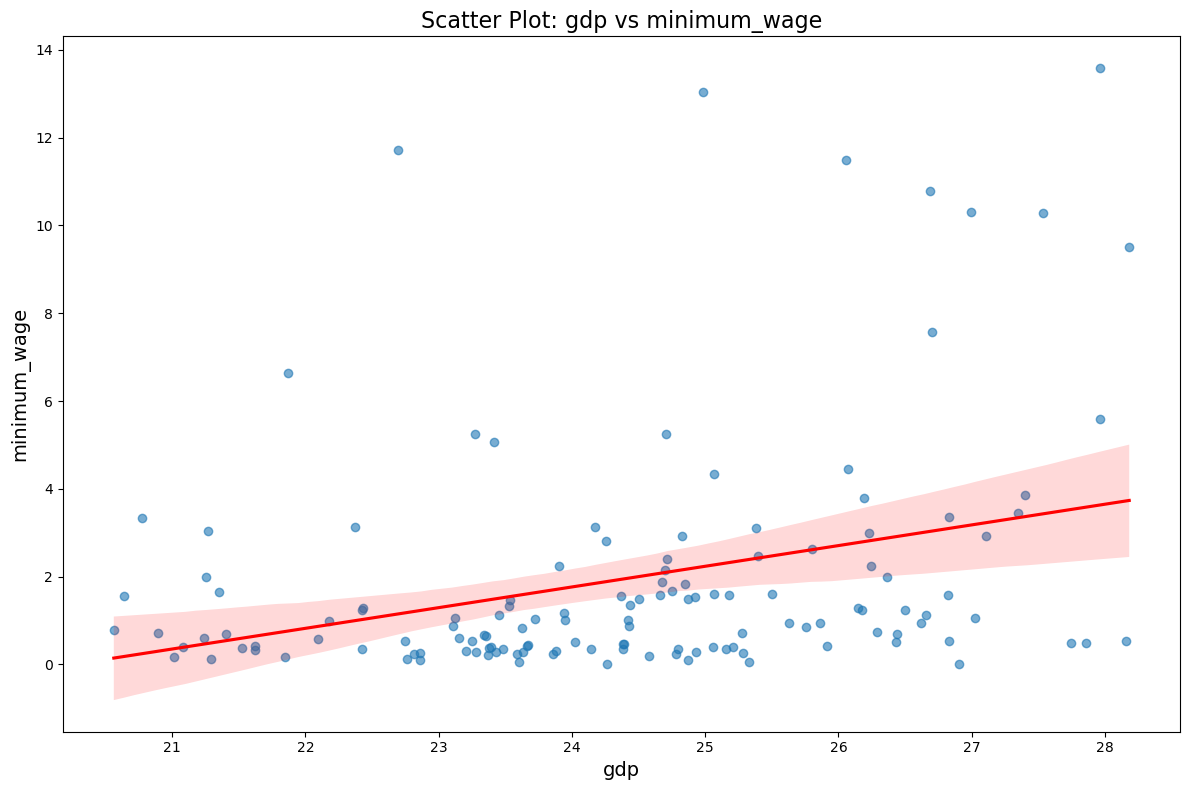

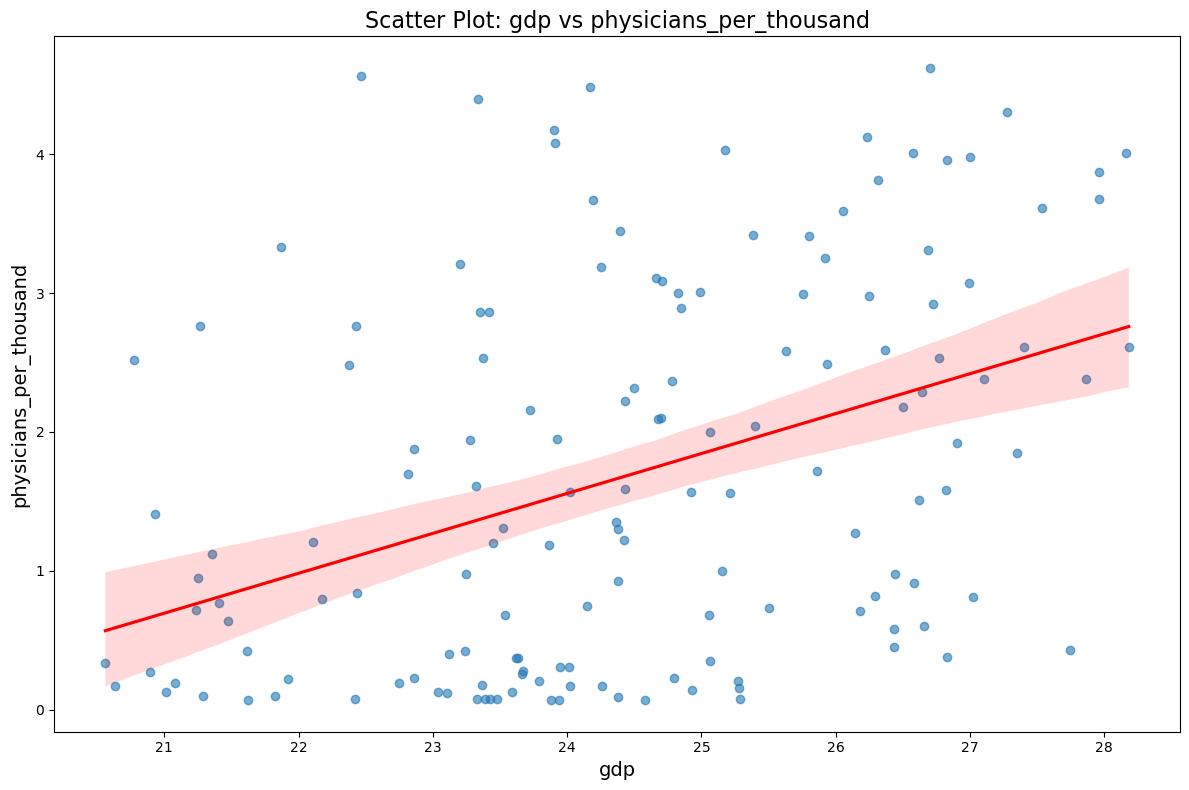

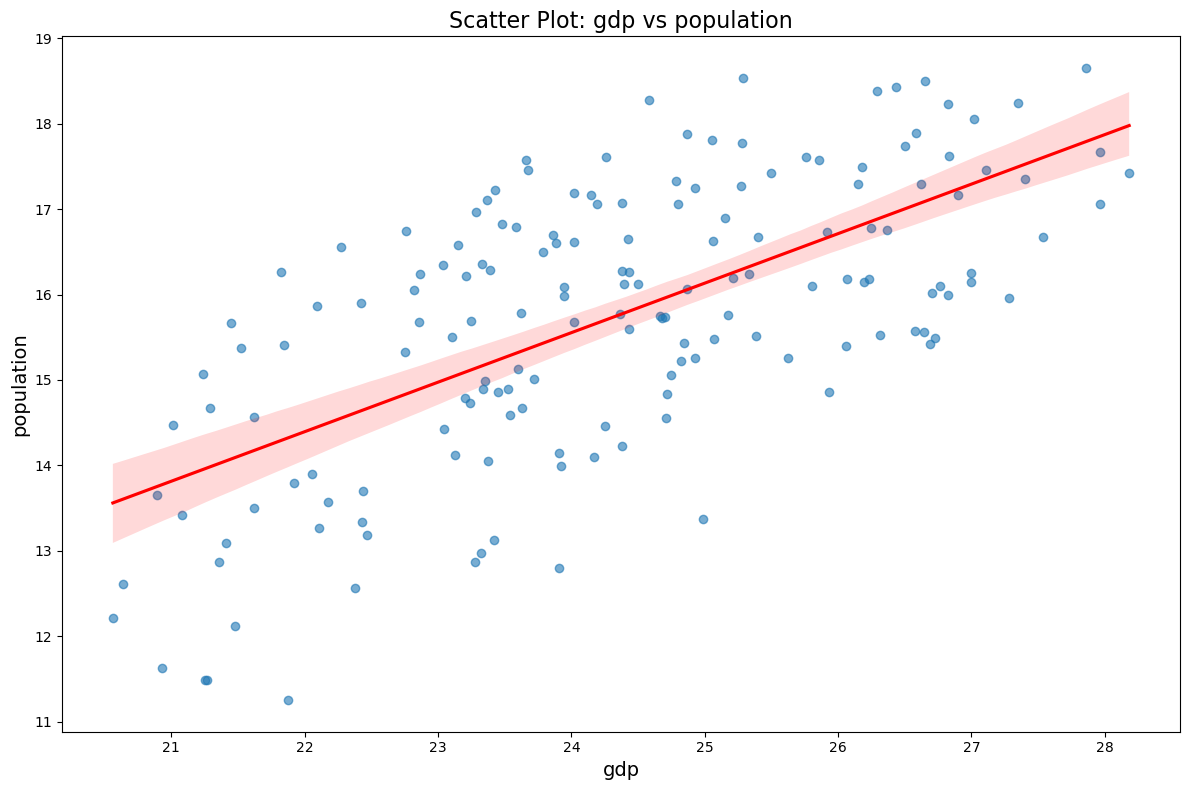

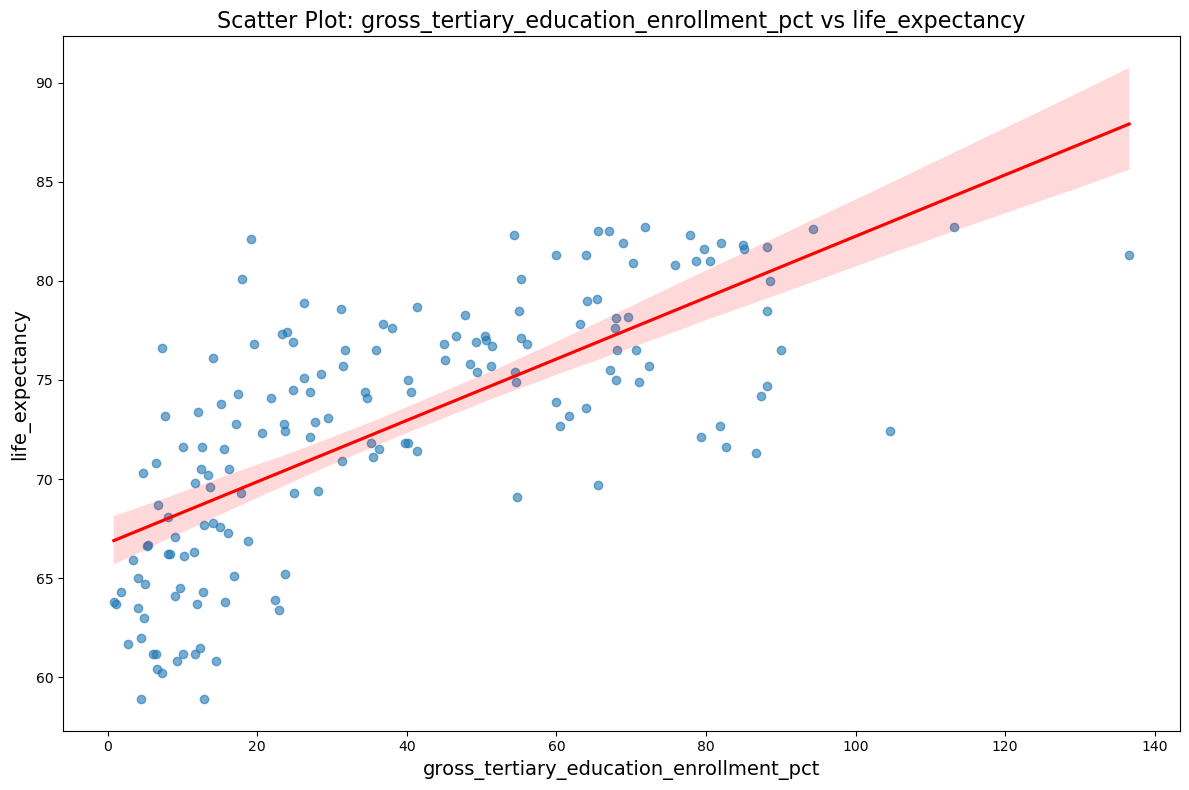

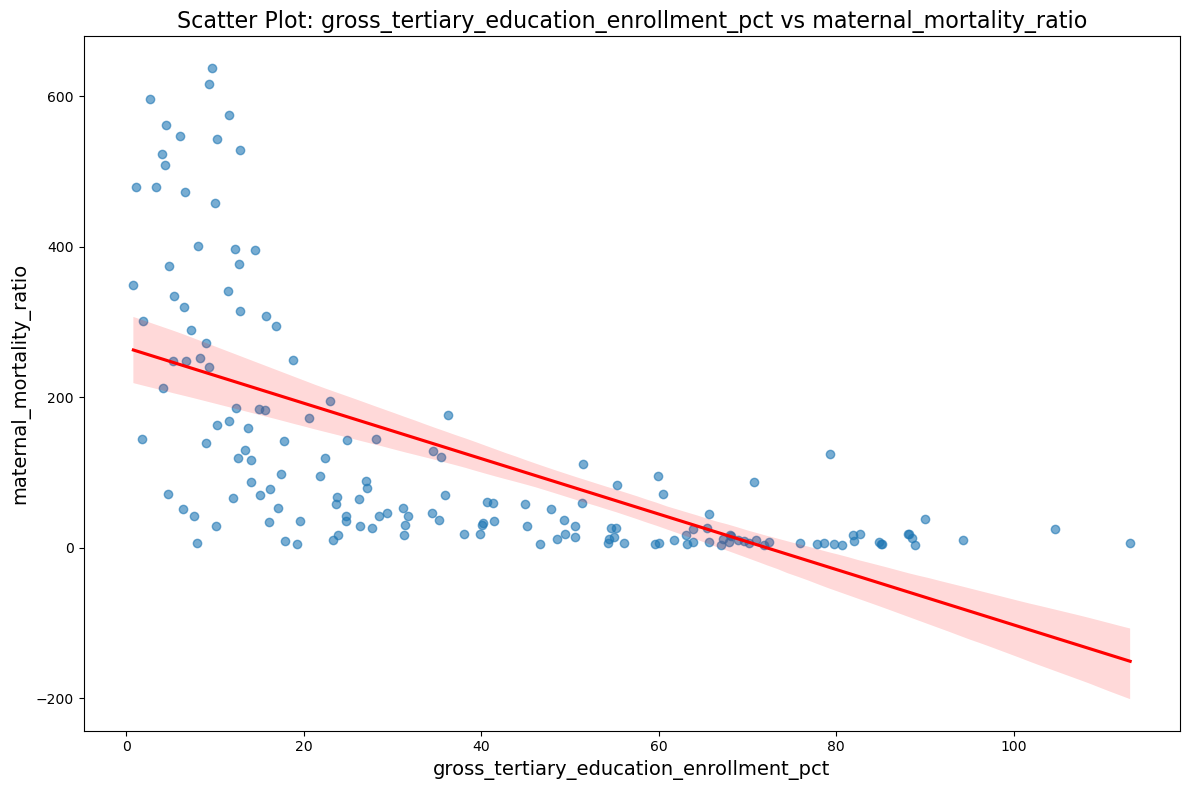

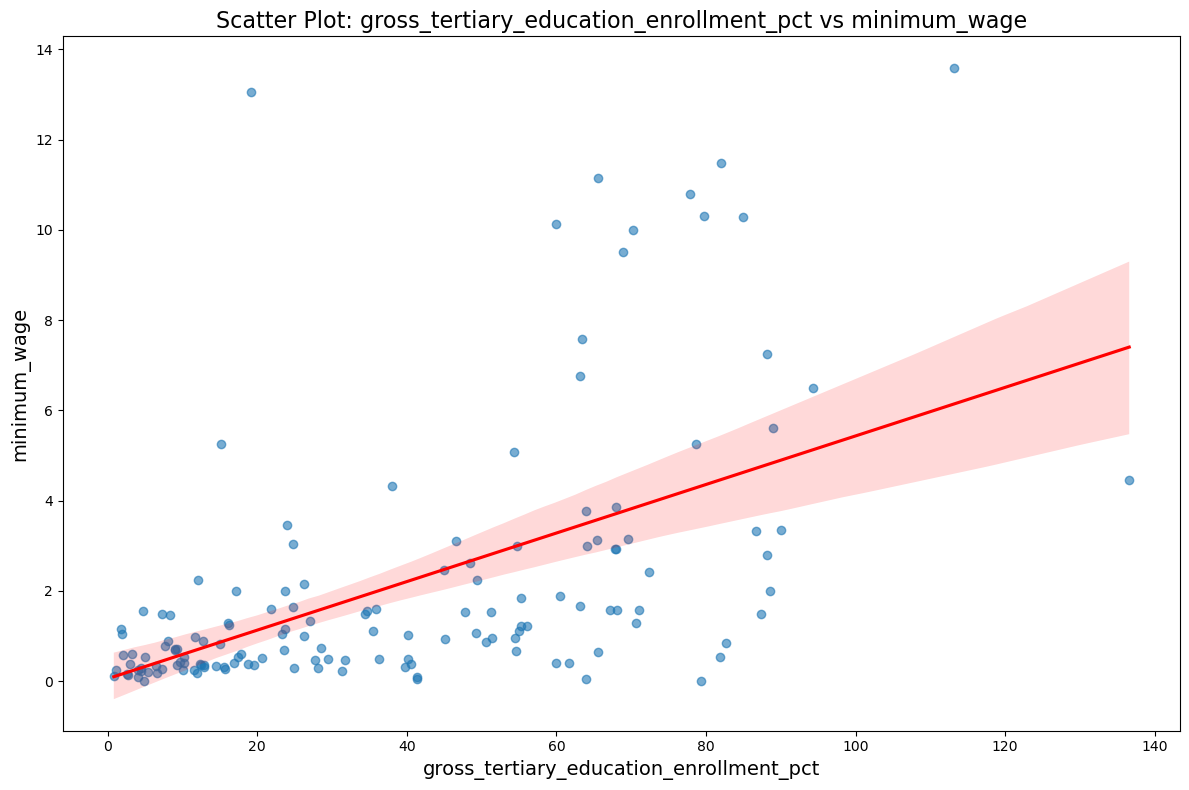

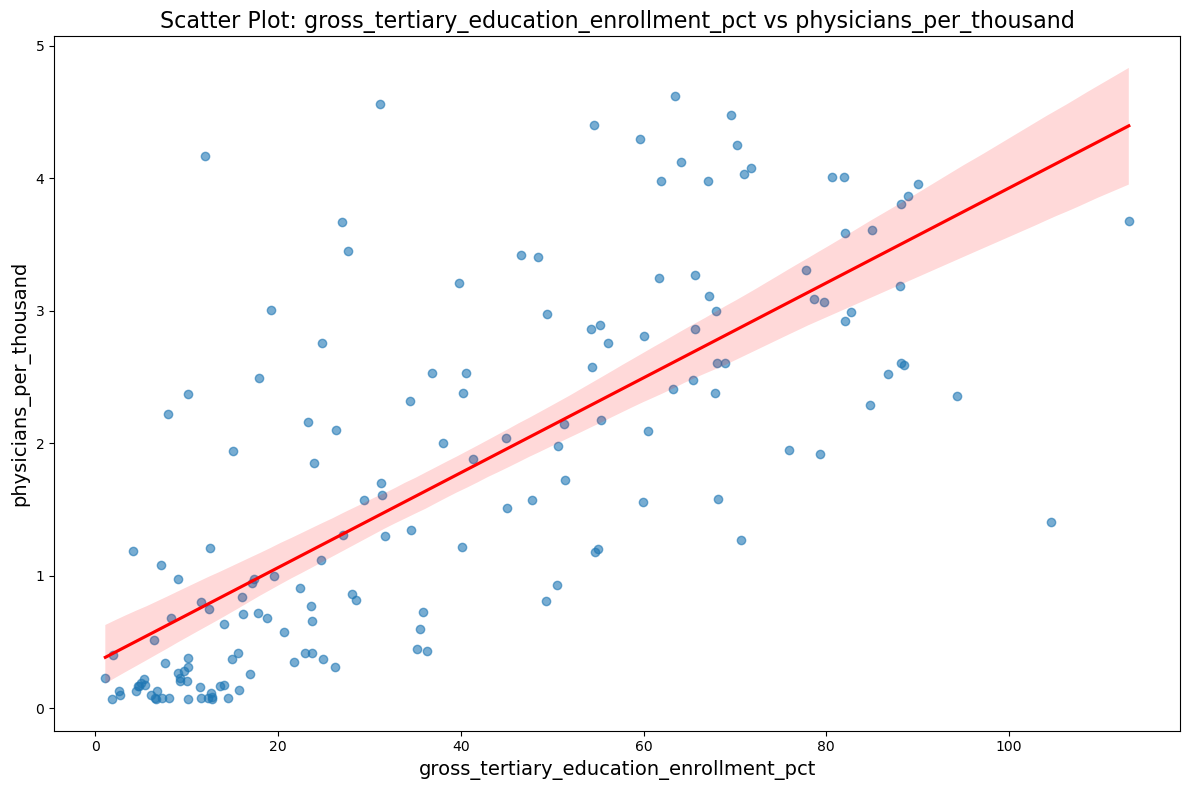

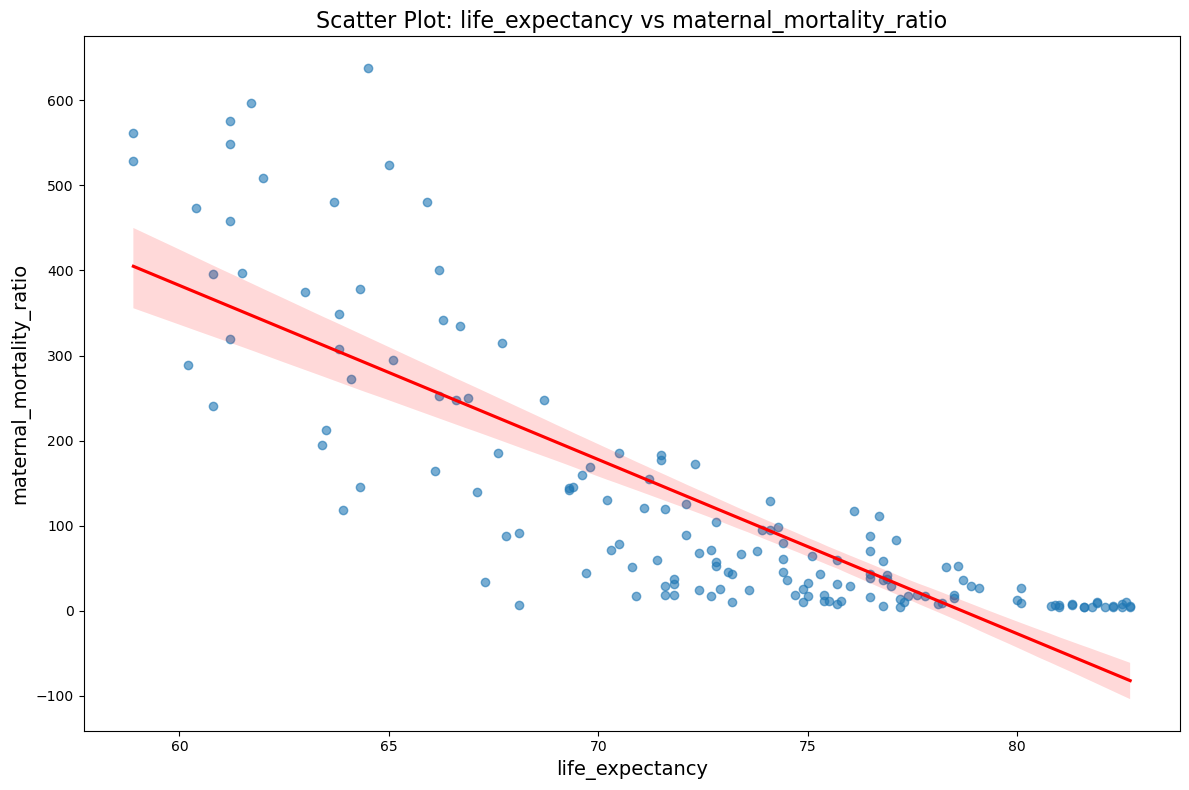

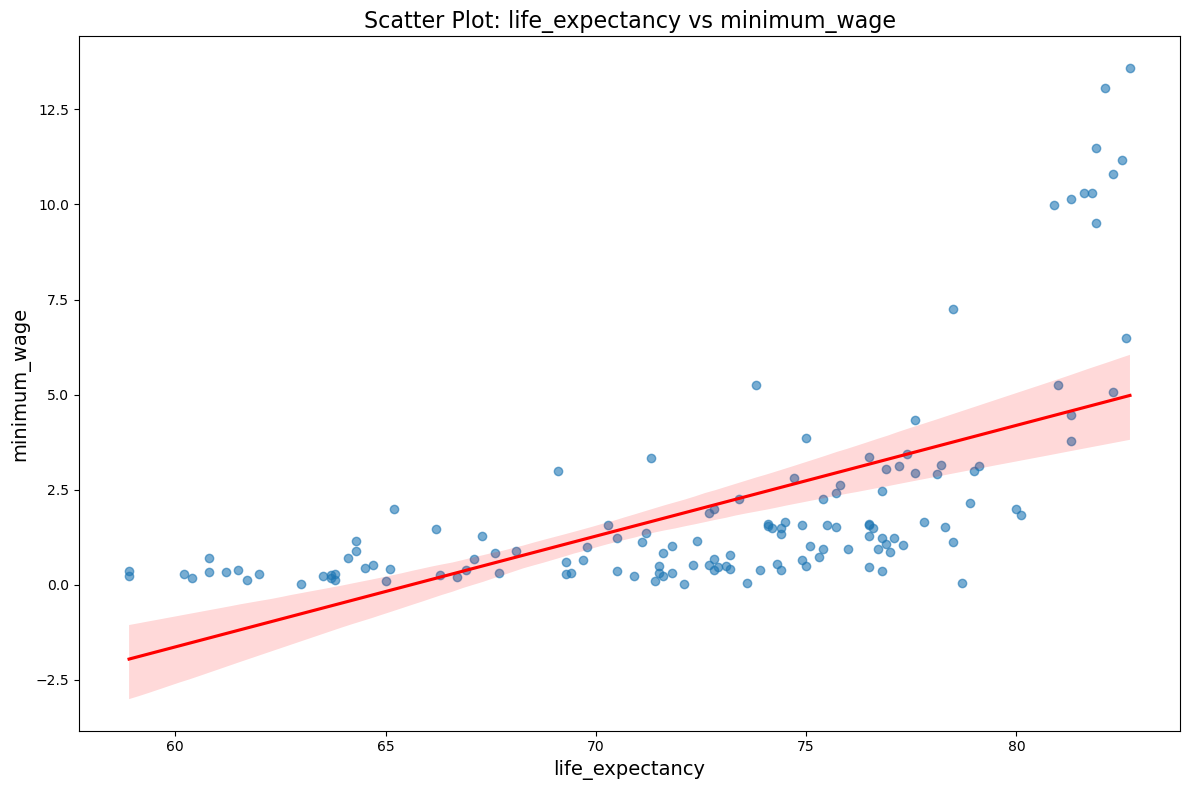

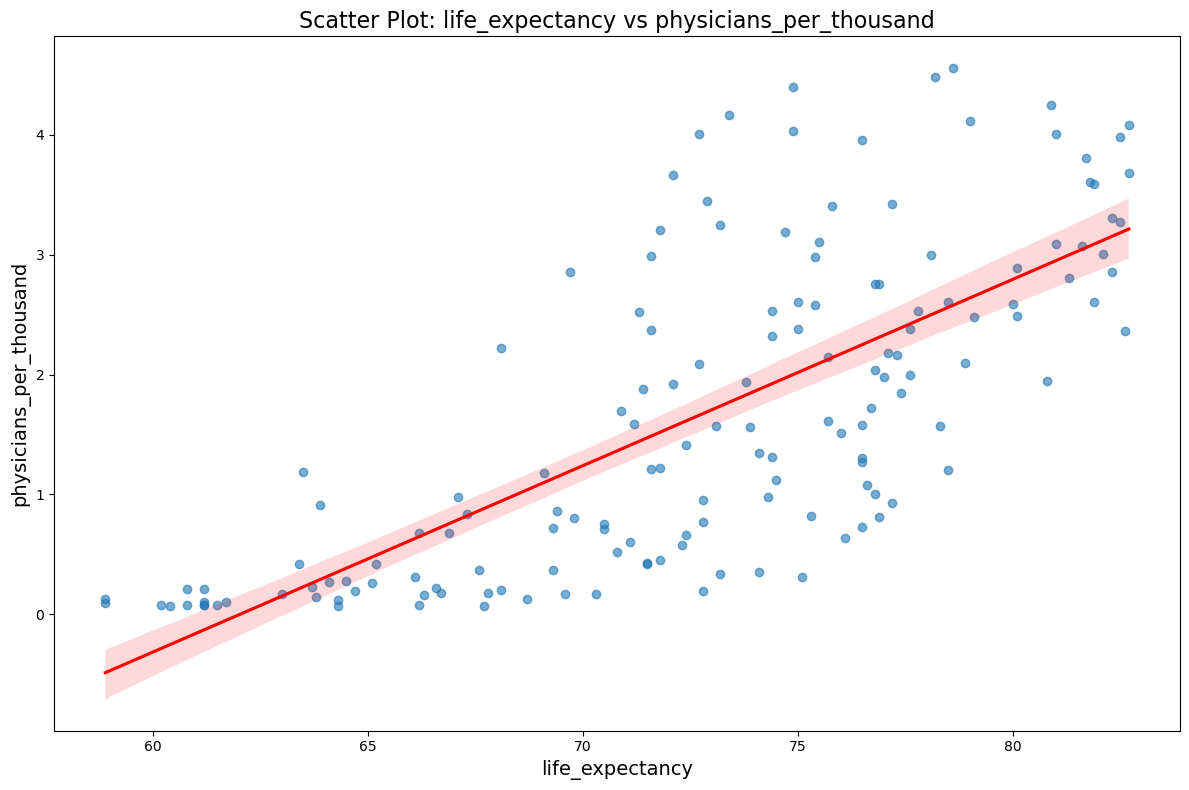

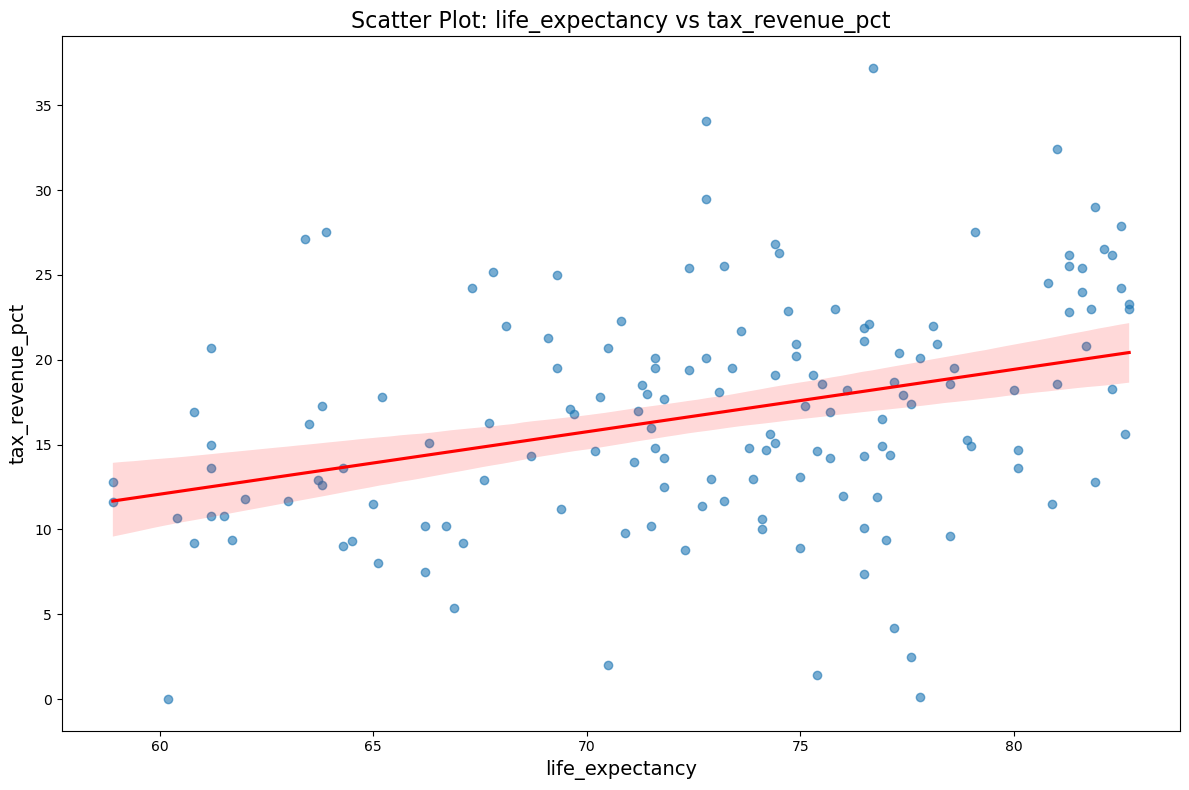

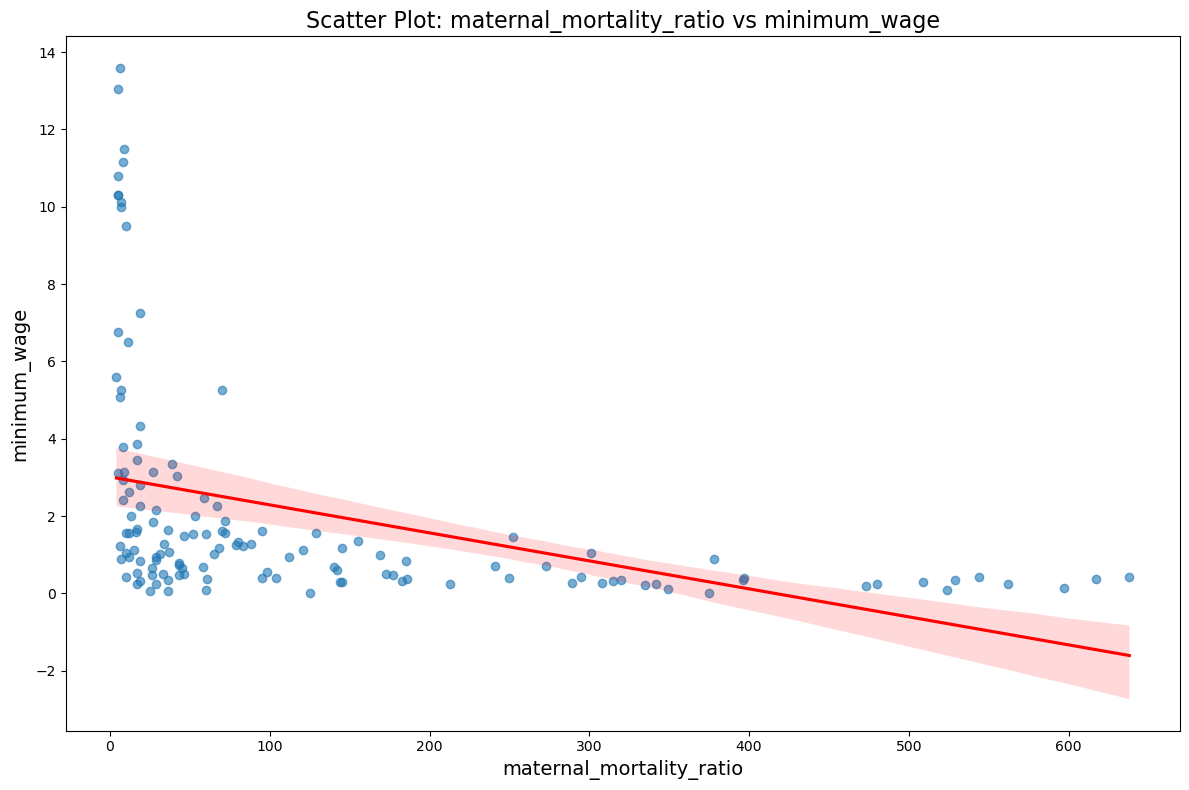

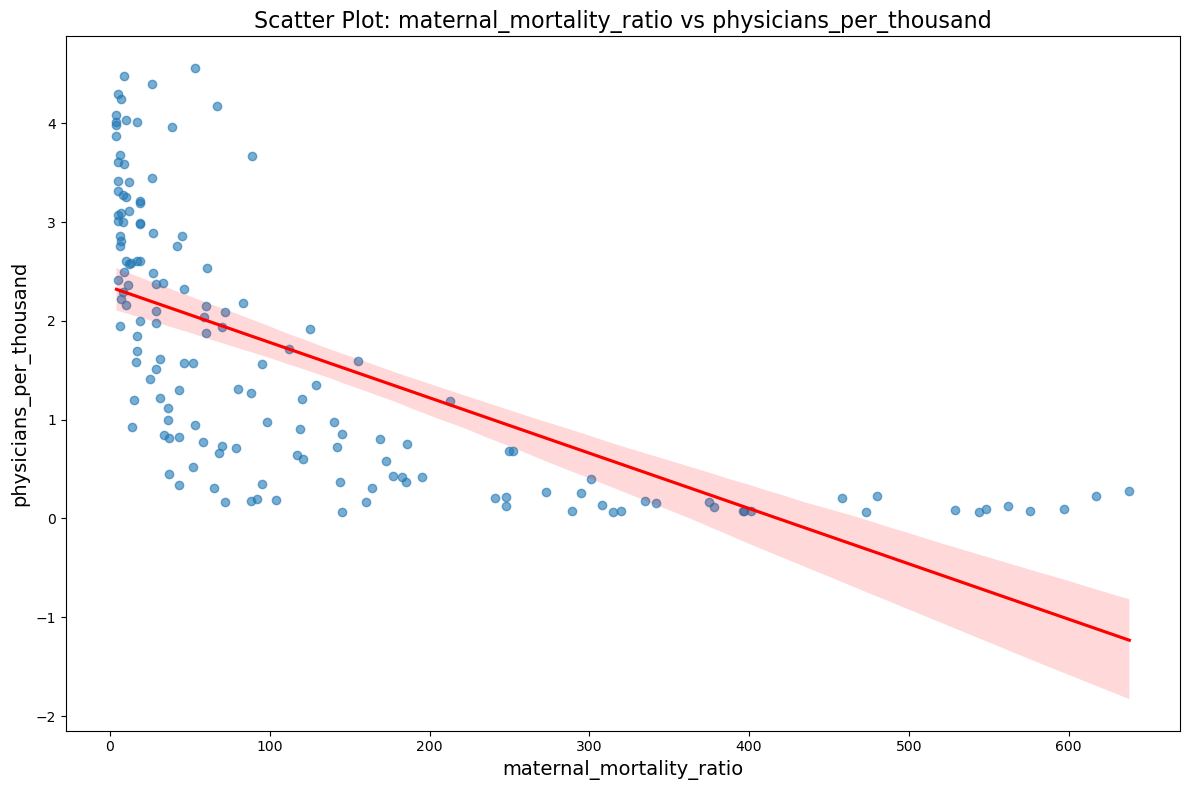

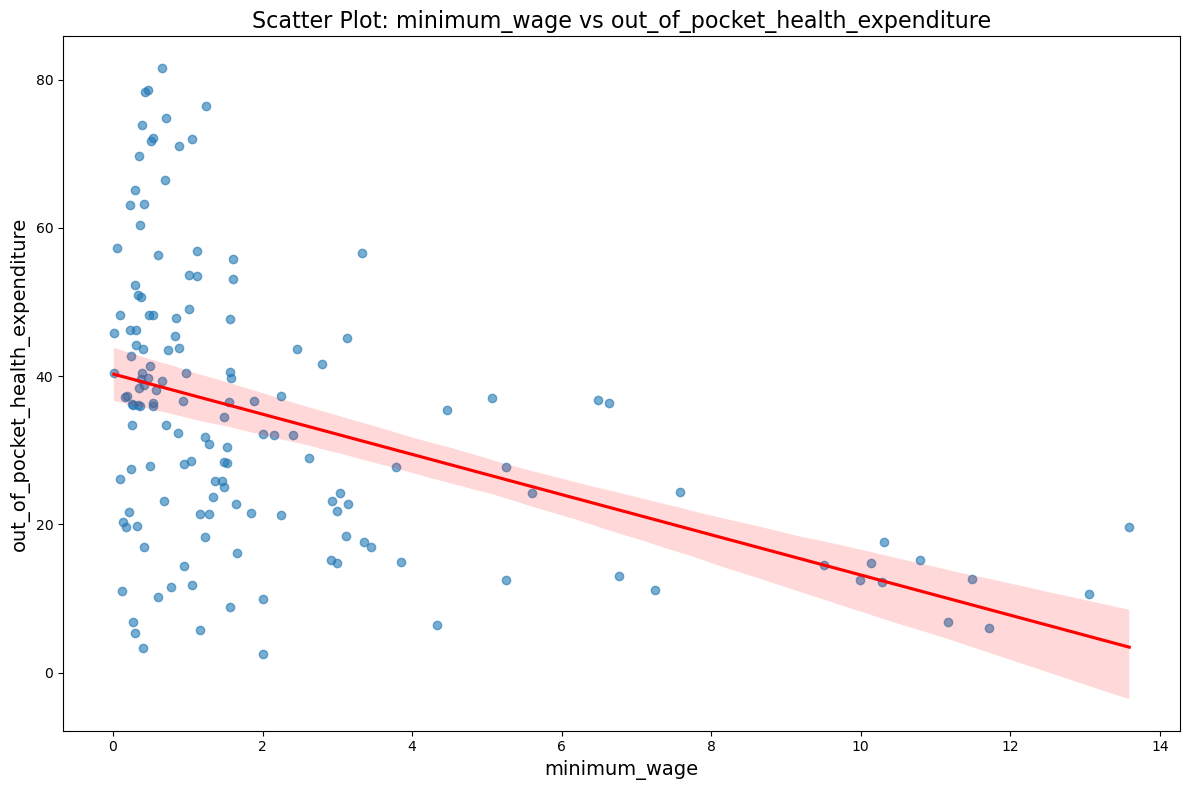

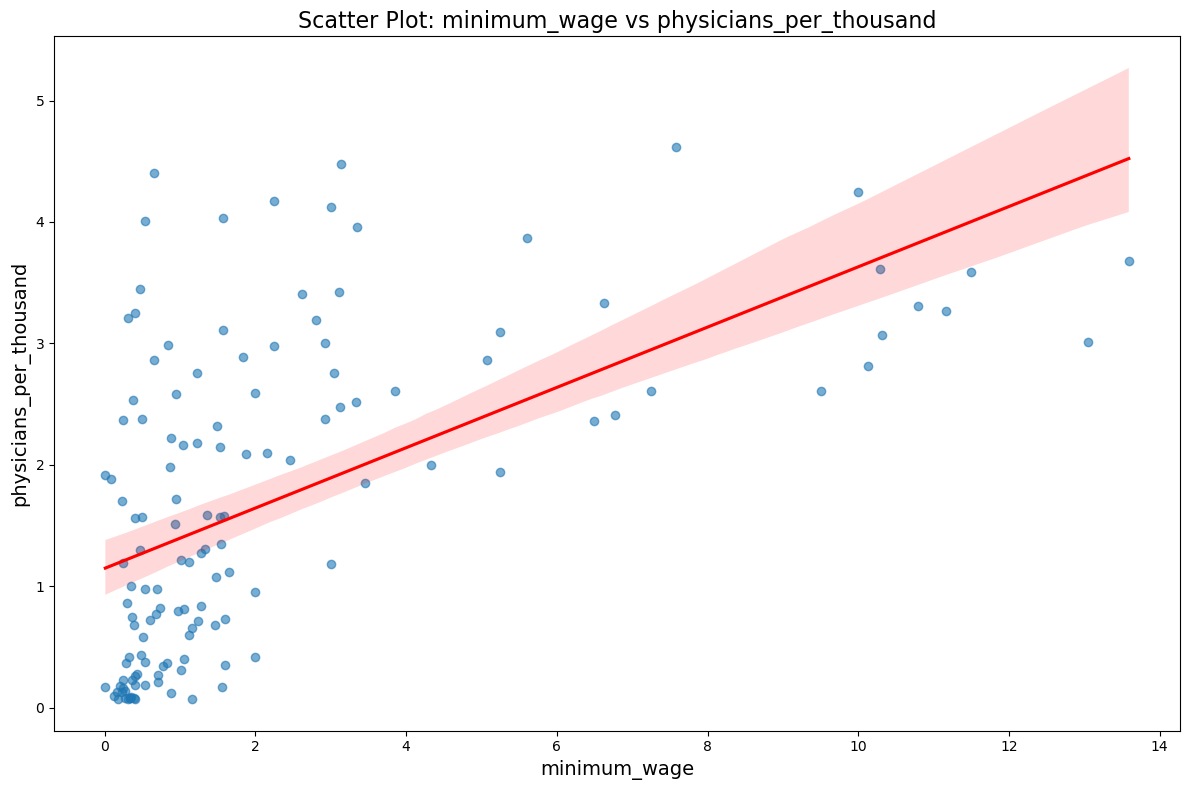

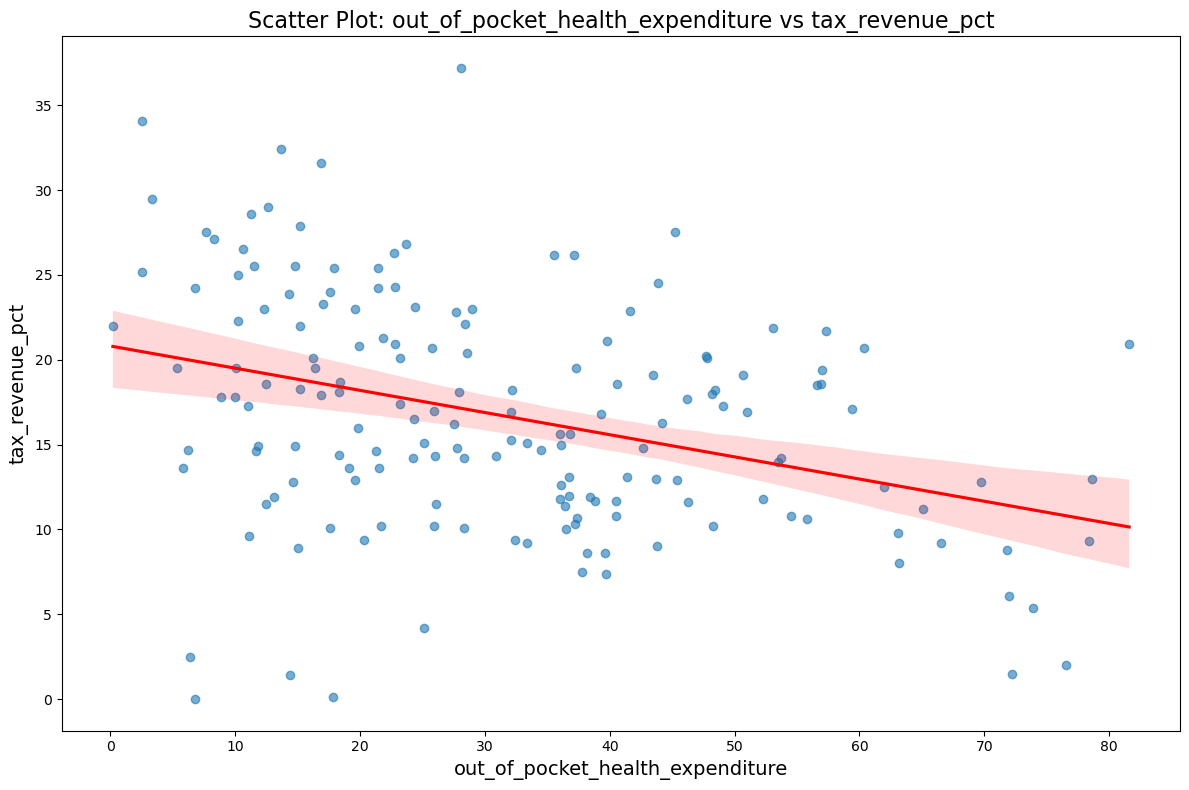

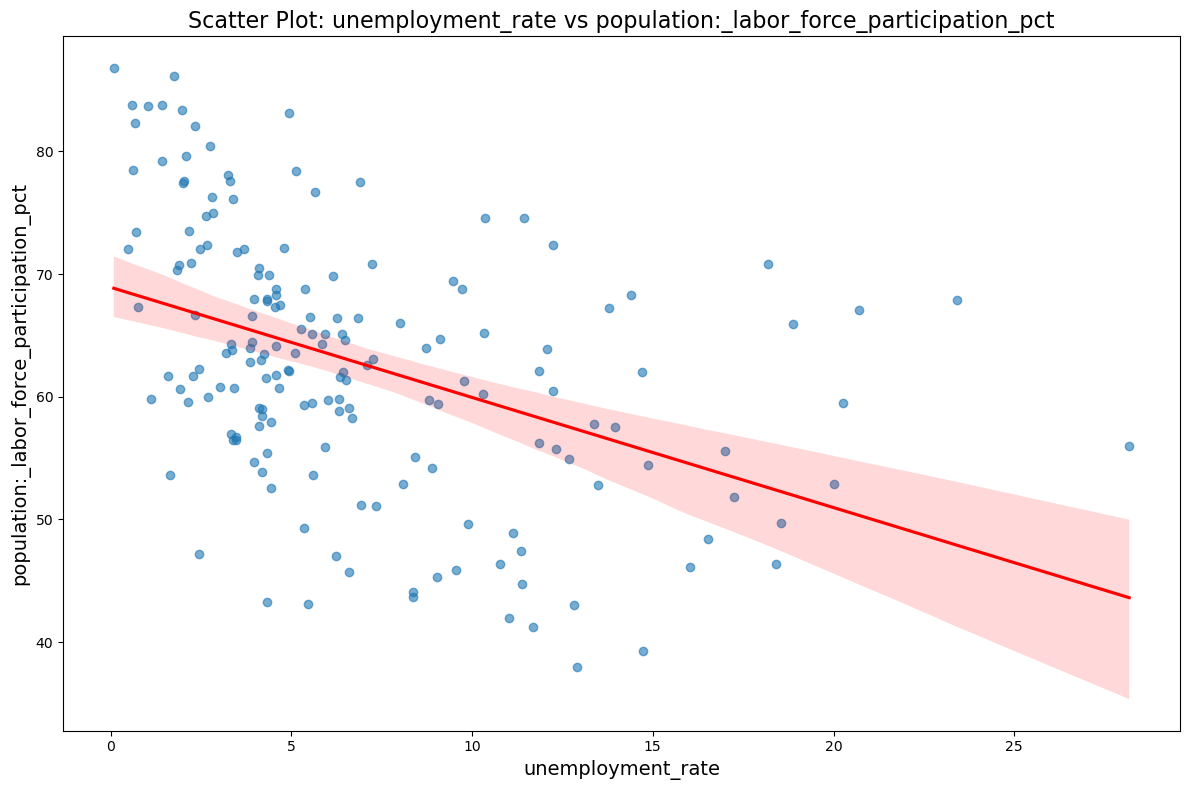

In [6]:
# Scatter plot function
def plot_scatter(x, y, df, log_x=False, log_y=False, title=None, xlabel=None, ylabel=None, save_path=None):
    plt.figure(figsize=(12,8))
    x_data = np.log1p(df[x]) if log_x else df[x]
    y_data = np.log1p(df[y]) if log_y else df[y]
    sns.regplot(x=x_data, y=y_data, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    plt.title(title if title else f'Scatter Plot: {x} vs {y}', fontsize=16)
    plt.xlabel(xlabel if xlabel else x, fontsize=14)
    plt.ylabel(ylabel if ylabel else y, fontsize=14)
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=300)
    plt.show()

# Scatter groups
scatter_groups = {
    'CPI Correlations': [
        {'x': 'cpi', 'y': 'cpi_change_pct', 'log_x':True},
    ],
    'Gasoline Price Corrections': [
        {'x': 'gasoline_price', 'y': 'minimum_wage'},
        {'x': 'gasoline_price', 'y': 'tax_revenue_pct'},
    ],
    'GDP Correlations': [
        {'x': 'gdp', 'y': 'gross_tertiary_education_enrollment_pct', 'log_x':True},
        {'x': 'gdp', 'y': 'minimum_wage', 'log_x':True},
        {'x': 'gdp', 'y': 'physicians_per_thousand', 'log_x':True},
        {'x': 'gdp', 'y': 'population', 'log_x':True, 'log_y':True},
    ],
    'Education Correlation': [
        {'x': 'gross_tertiary_education_enrollment_pct', 'y': 'life_expectancy'},
        {'x': 'gross_tertiary_education_enrollment_pct', 'y': 'maternal_mortality_ratio'},
        {'x': 'gross_tertiary_education_enrollment_pct', 'y': 'minimum_wage'},
        {'x': 'gross_tertiary_education_enrollment_pct', 'y': 'physicians_per_thousand'},
    ],
    'Life Expectancy Correlations': [
        {'x': 'life_expectancy', 'y': 'maternal_mortality_ratio'},
        {'x': 'life_expectancy', 'y': 'minimum_wage'},
        {'x': 'life_expectancy', 'y': 'physicians_per_thousand'},
        {'x': 'life_expectancy', 'y': 'tax_revenue_pct'},
    ],
    'Maternal Mortality Correlations': [
        {'x': 'maternal_mortality_ratio', 'y': 'minimum_wage'},
        {'x': 'maternal_mortality_ratio', 'y': 'physicians_per_thousand'},
    ],
    'Minimum Wage Correlations': [
        {'x': 'minimum_wage', 'y': 'out_of_pocket_health_expenditure'},
        {'x': 'minimum_wage', 'y': 'physicians_per_thousand'},
    ],
    'Out of Pocket Health Expenditure Correlations': [
        {'x': 'out_of_pocket_health_expenditure', 'y': 'tax_revenue_pct'},
    ],
    'Unemployment Rate Correlations': [
        {'x': 'unemployment_rate', 'y': 'population:_labor_force_participation_pct'},
    ]
}


# Automate scatter plots
for group_name, pairs in scatter_groups.items():
    for pair in pairs:
        plot_scatter(
            x=pair['x'],
            y=pair['y'],
            df=df,
            log_x=pair.get('log_x', False),
            log_y=pair.get('log_y', False),
            title=f'Scatter Plot: {pair["x"]} vs {pair["y"]}',
            xlabel=pair['x'],
            ylabel=pair['y'],
            save_path=PLOT_PATH + f'scatter_{pair["x"]}_vs_{pair["y"]}'
        )

## 2.4 Outlier Detection & Annotation: CPI Change
<div style='background-color:#212121; color:#fff; border-left: 6px solid #ff9800; padding: 18px; font-size: 16px; line-height: 1.7;'>
<b style='color:#ff9800; font-size:18px;'>What was accomplished in this section?</b>
<ul>
<li><b style='color:#ffd54f;'>Identified countries with extreme CPI change rates using the 95th percentile threshold.</b></li>
<li><b style='color:#ffd54f;'>Displayed outlier details for further investigation.</b></li>
<li><b style='color:#ffd54f;'>Annotated outlier countries directly on the CPI vs CPI Change scatter plot for clear visual context.</b></li>
</ul>
<b style='color:#ff9800;'>Summary:</b> This step highlights economic anomalies and supports deeper analysis of inflation outliers, improving interpretability and guiding further feature engineering.
</div>

Outliers (cpi_change_pct > 95th percentile):
                      country      cpi  cpi_change_pct
6                   Argentina   232.75            53.5
33   Central African Republic   186.86            37.1
79                       Iran   550.93            39.9
96                    Liberia   223.13            23.6
163               South Sudan  4583.71           187.9
166                     Sudan  1344.19            51.0
167                  Suriname   294.66            22.0
170                     Syria   143.20            36.7
190                 Venezuela  2740.27           254.9


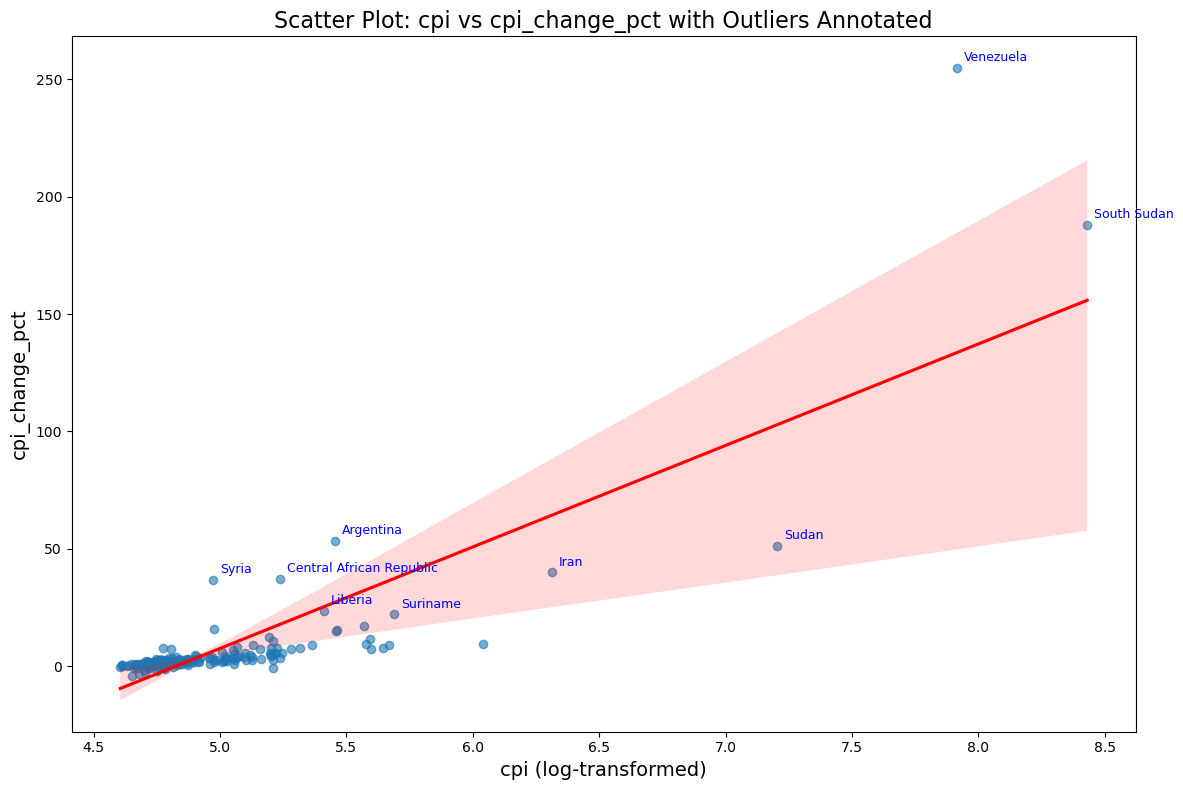

In [7]:
# Identify outliers in CPI vs CPI Change Percentage
threshold = df['cpi_change_pct'].quantile(0.95)
outliers = df[df['cpi_change_pct'] > threshold]

# Display outlier details
print("Outliers (cpi_change_pct > 95th percentile):")
print(outliers[['country', 'cpi', 'cpi_change_pct']])

# Annotate outliers on the scatter plot
plt.figure(figsize=(12,8))
x_data = np.log1p(df['cpi'])
y_data = df['cpi_change_pct']
sns.regplot(
    x=x_data,
    y=y_data,
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red'}
)
for idx, row in outliers.iterrows():
    plt.annotate(
        row['country'],
        (np.log1p(row['cpi']), row['cpi_change_pct']),
        textcoords="offset points",
        xytext=(5,5),
        ha='left',
        fontsize=9,
        color='blue'
    )
plt.title('Scatter Plot: cpi vs cpi_change_pct with Outliers Annotated', fontsize=16)
plt.xlabel('cpi (log-transformed)', fontsize=14)
plt.ylabel('cpi_change_pct', fontsize=14)
plt.tight_layout()
plt.savefig(PLOT_PATH + 'scatter_cpi_vs_cpi_change_pct_outliers.png', dpi=300)
plt.show()


## 2.5 Excluding Outliers for Clearer Analysis
<div style='background-color:#212121; color:#fff; border-left: 6px solid #388e3c; padding: 18px; font-size: 16px; line-height: 1.7;'>
<b style='color:#388e3c; font-size:18px;'>What was accomplished in this section?</b>
<ul>
<li><b style='color:#81c784;'>Filtered out countries with extreme CPI change rates to focus on typical inflation cases.</b></li>
<li><b style='color:#81c784;'>Replotted CPI vs CPI Change scatter plot without outliers for improved interpretability.</b></li>
<li><b style='color:#81c784;'>Enabled more accurate visual analysis of the main data distribution.</b></li>
</ul>
<b style='color:#388e3c;'>Summary:</b> This step refines the analysis by removing outliers, allowing for clearer insights into the relationship between CPI and inflation rates among most countries.
</div>

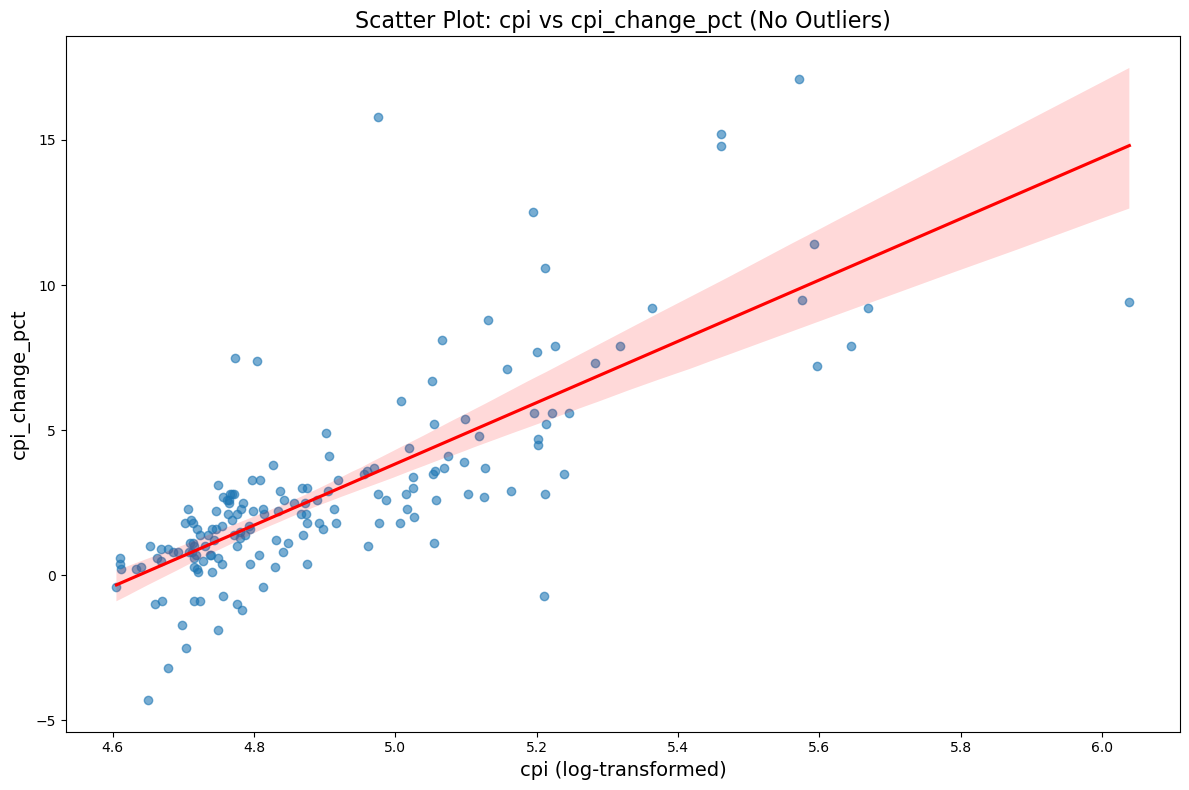

In [8]:
# Exlude outliers and re-plot
df_no_outliers = df[df['cpi_change_pct'] <= threshold]
plot_scatter(
    x='cpi',
    y='cpi_change_pct',
    df=df_no_outliers,
    log_x=True,
    title='Scatter Plot: cpi vs cpi_change_pct (No Outliers)',
    xlabel='cpi (log-transformed)',
    ylabel='cpi_change_pct',
    save_path=PLOT_PATH + 'scatter_cpi_vs_cpi_change_pct_no_outliers.png'
)

## 2.6 Feature Engineering: Dynamic Economic Classification
<div style='background-color:#212121; color:#fff; border-left: 6px solid #1976d2; padding: 18px; font-size: 16px; line-height: 1.7;'>
<b style='color:#1976d2; font-size:18px;'>What was accomplished in this section?</b>
<ul>
<li><b style='color:#64b5f6;'>Defined a robust function to classify countries' economic status based on CPI change percentage.</b></li>
<li><b style='color:#64b5f6;'>Created a new <code>economic_flag</code> column to dynamically label each country as experiencing deflation, stable prices, normal inflation, high inflation, or hyperinflation.</b></li>
<li><b style='color:#64b5f6;'>Enabled clear, interpretable groupings for downstream analysis, reporting, and modeling.</b></li>
<li><b style='color:#64b5f6;'>Demonstrated best practices in feature engineering for economic indicators.</b></li>
</ul>
<b style='color:#1976d2;'>Summary:</b> This step enhances the dataset's interpretability and analytical power by providing actionable, domain-driven labels for each country's inflation status. The approach is fully dynamic and ready for further EDA or predictive modeling.
</div>

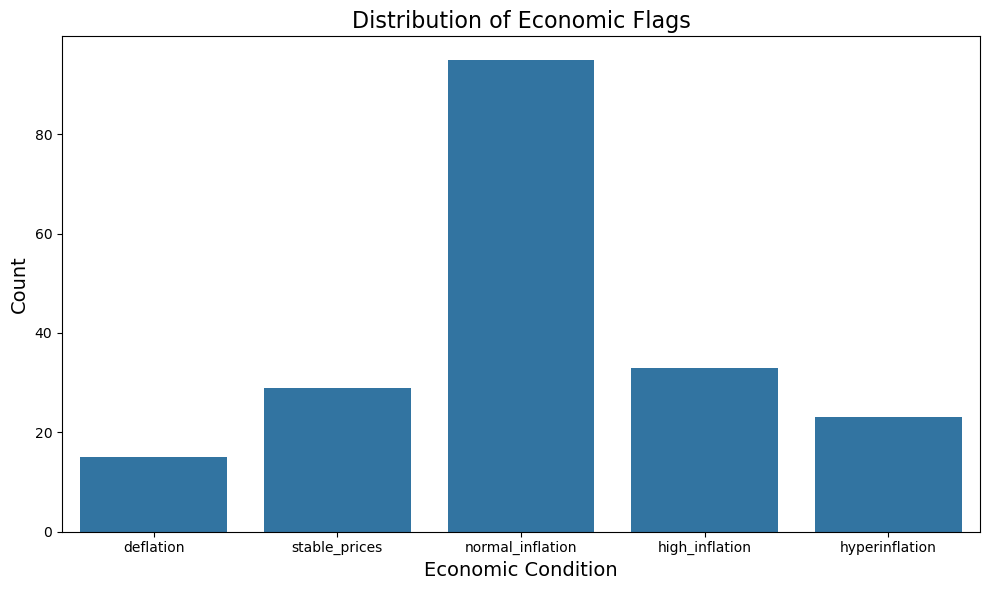

In [9]:
# Function to classify economic conditions based on cpi_change_pct
def classify_economy(cpi_change_pct):
    if cpi_change_pct < 0:
        return 'deflation'
    elif 0 <= cpi_change_pct < 1:
        return 'stable_prices'
    elif 1 <= cpi_change_pct <= 5:
        return 'normal_inflation'
    elif 5 < cpi_change_pct <= 30:
        return 'high_inflation'
    else:
        return 'hyperinflation'

# Order of economic conditions
order = ['deflation', 'stable_prices', 'normal_inflation', 'high_inflation', 'hyperinflation']

# Create flag column for economic outliers
df['economic_flag'] = df['cpi_change_pct'].apply(classify_economy)
df['economic_flag'].value_counts()

# Show distribution of economic flags
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='economic_flag', order=order)
plt.title('Distribution of Economic Flags', fontsize=16)
plt.xlabel('Economic Condition', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.savefig(PLOT_PATH + 'economic_flag_distribution.png', dpi=300)
plt.show()

## 2.7 Gasoline Price vs Minimum Wage & Tax Revenue

<div style='background-color:#212121; color:#fff; border-left: 6px solid #9c27b0; padding: 18px; font-size: 16px; line-height: 1.7;'>

<b style='color:#9c27b0; font-size:18px;'>What was accomplished in this section?</b>

<ul>

<li><b style='color:#ce93d8;'>Analyzed the relationship between gasoline prices and economic indicators (minimum wage, tax revenue) across different economic conditions.</b></li>

<li><b style='color:#ce93d8;'>Created boxplots segmented by economic flag to reveal how minimum wage and tax revenue vary across deflation, stable prices, normal inflation, high inflation, and hyperinflation.</b></li>

<li><b style='color:#ce93d8;'>Applied IQR-based outlier detection to identify countries with exceptional minimum wage or tax revenue patterns within each economic condition.</b></li>

<li><b style='color:#ce93d8;'>Annotated outlier countries directly on visualizations for transparent, interpretable analysis.</b></li>

<li><b style='color:#ce93d8;'>Generated clean versions of boxplots without outliers to focus on typical patterns and reduce visual noise.</b></li>

</ul>

<b style='color:#9c27b0;'>Summary:</b> This analysis reveals how economic stability influences wage structures and tax systems. Countries with normal inflation tend to show more consistent minimum wage and tax revenue patterns, while hyperinflation economies display high variability. Outlier identification highlights exceptional cases that warrant further investigation for policy or economic research.

</div>


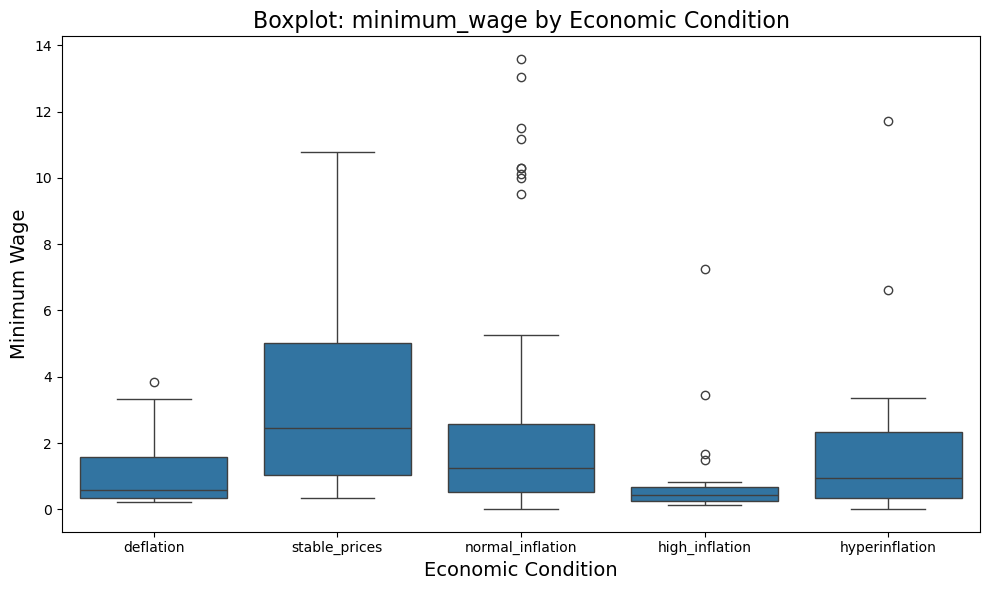

          country  minimum_wage economic_flag
151  Saudi Arabia          3.85     deflation
Empty DataFrame
Columns: [country, minimum_wage, economic_flag]
Index: []
            country  minimum_wage     economic_flag
8         Australia         13.59  normal_inflation
16          Belgium         10.31  normal_inflation
32           Canada          9.51  normal_inflation
60           France         11.16  normal_inflation
64          Germany          9.99  normal_inflation
100      Luxembourg         13.05  normal_inflation
122     Netherlands         10.29  normal_inflation
123     New Zealand         11.49  normal_inflation
185  United Kingdom         10.13  normal_inflation
           country  minimum_wage   economic_flag
15         Belarus          1.49  high_inflation
179         Turkey          3.45  high_inflation
186  United States          7.25  high_inflation
187        Uruguay          1.66  high_inflation
     country  minimum_wage   economic_flag
3    Andorra          6.63

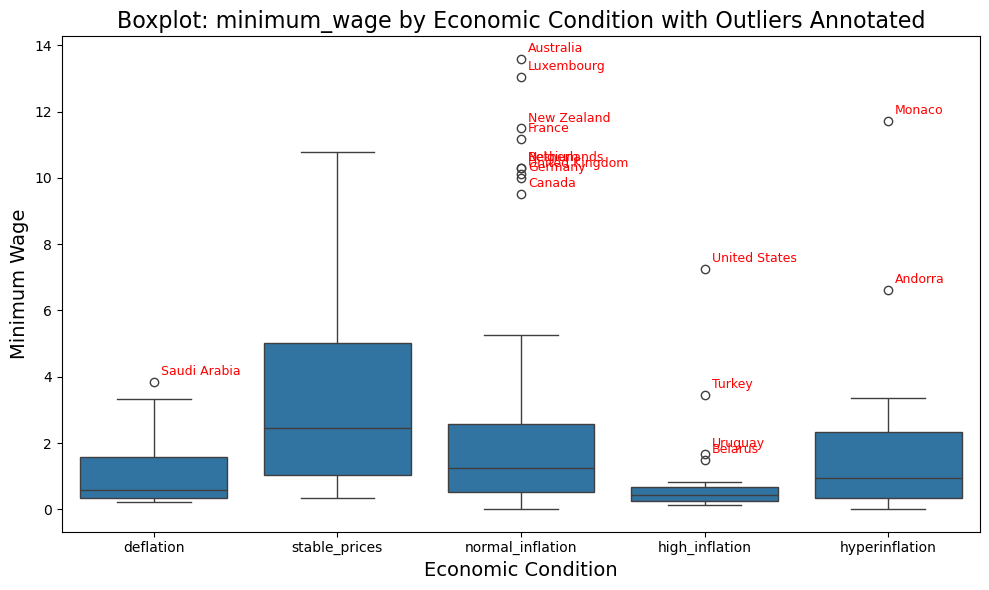

In [10]:
# Show distribution of economic flags and minimum wage boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='economic_flag', y='minimum_wage', data=df, order=order)
plt.title('Boxplot: minimum_wage by Economic Condition', fontsize=16)
plt.xlabel('Economic Condition', fontsize=14)
plt.ylabel('Minimum Wage', fontsize=14)
plt.tight_layout()
plt.savefig(PLOT_PATH + 'minimum_wage_by_economic_flag.png', dpi=300)
plt.show()

# Outlier analysis for minimum wage
group = ['deflation','stable_prices','normal_inflation', 'high_inflation', 'hyperinflation']
all_outliers = []

for g in group:
    group_df = df[df['economic_flag'] == g]
    Q1 = group_df['minimum_wage'].quantile(0.25)
    Q3 = group_df['minimum_wage'].quantile(0.75)
    IQR = Q3 - Q1
    low_threshold = Q1 - 1.5 * IQR
    high_threshold = Q3 + 1.5 * IQR

    # Identify outliers based on the calculated thresholds
    outliers = group_df[
        (group_df['minimum_wage'] > high_threshold) | (group_df['minimum_wage'] < low_threshold)
    ]
    print(outliers[['country', 'minimum_wage', 'economic_flag']])
    all_outliers.append(outliers)

outliers_df = pd.concat(all_outliers)

# Build the plot with outliers annotated
plt.figure(figsize=(10,6))
sns.boxplot(x='economic_flag', y='minimum_wage', data=df, order=order)
for idx, row in outliers_df.iterrows():
    plt.annotate(
        row['country'],
        (order.index(row['economic_flag']), row['minimum_wage']),
        textcoords="offset points",
        xytext=(5,5),
        ha='left',
        fontsize=9,
        color='red'
    )
plt.title('Boxplot: minimum_wage by Economic Condition with Outliers Annotated', fontsize=16)
plt.xlabel('Economic Condition', fontsize=14)
plt.ylabel('Minimum Wage', fontsize=14)
plt.tight_layout()
plt.savefig(PLOT_PATH + 'minimum_wage_by_economic_flag_with_outliers.png', dpi=300)
plt.show()

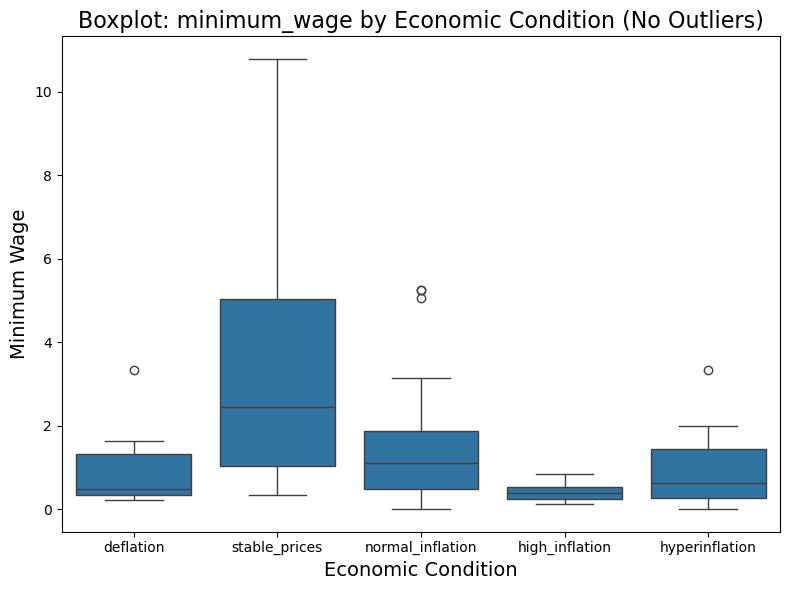

In [11]:
# Replot Minimum Wage by Economic Condition without outliers
df_without_outliers = df[~df.index.isin(outliers_df.index)]

plt.figure(figsize=(8,6))
sns.boxplot(x='economic_flag', y='minimum_wage', data=df_without_outliers, order=order)
plt.title('Boxplot: minimum_wage by Economic Condition (No Outliers)', fontsize=16)
plt.xlabel('Economic Condition', fontsize=14)
plt.ylabel('Minimum Wage', fontsize=14)
plt.tight_layout()
plt.savefig(PLOT_PATH + 'minimum_wage_by_economic_flag_no_outliers.png', dpi=300)
plt.show()

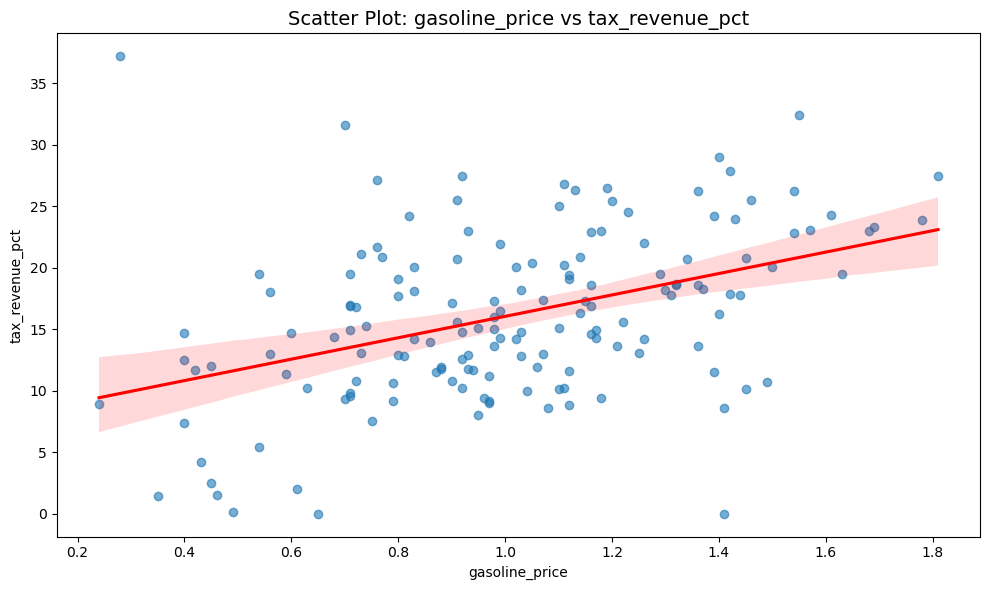

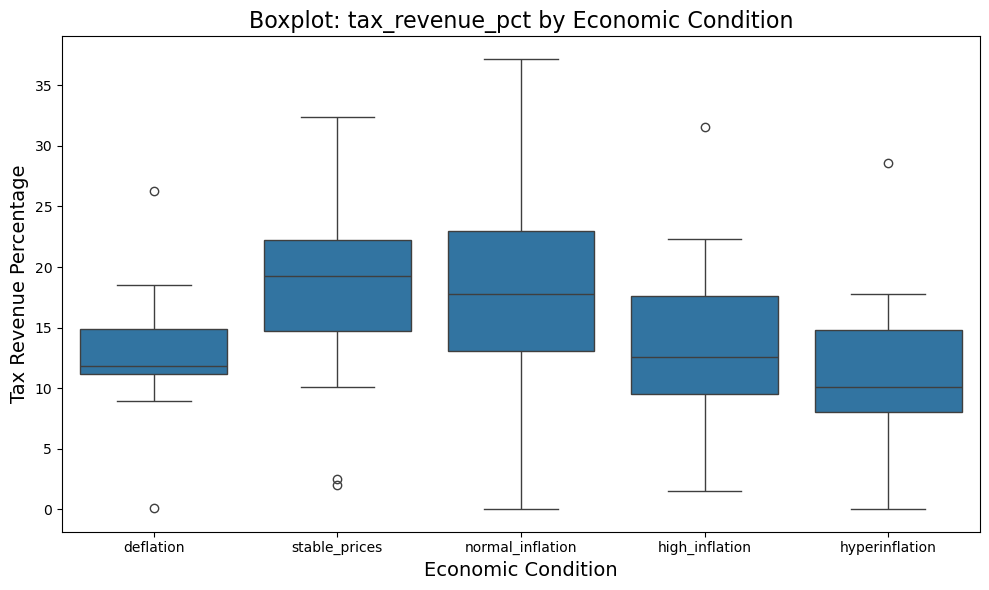

In [12]:
# Plot Gasoline Price vs Tax Revenue Percentage
plt.figure(figsize=(10,6))
sns.regplot(x=df['gasoline_price'], y=df['tax_revenue_pct'], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Scatter Plot: gasoline_price vs tax_revenue_pct', fontsize=14)
plt.xlabel('gasoline_price')
plt.ylabel('tax_revenue_pct')
plt.tight_layout()
plt.savefig(PLOT_PATH + 'gasoline_price_vs_tax_revenue_pct.png', dpi=300)
plt.show()

# Plot Tax Revenue Percentage by Economic Condition
plt.figure(figsize=(10,6))
sns.boxplot(x='economic_flag', y='tax_revenue_pct', data=df, order=order)
plt.title('Boxplot: tax_revenue_pct by Economic Condition', fontsize=16)
plt.xlabel('Economic Condition', fontsize=14)
plt.ylabel('Tax Revenue Percentage', fontsize=14)
plt.tight_layout()
plt.savefig(PLOT_PATH + 'tax_revenue_pct_by_economic_flag.png', dpi=300)
plt.show()

                  country  tax_revenue_pct economic_flag
17                 Belize             26.3     deflation
184  United Arab Emirates              0.1     deflation
    country  tax_revenue_pct  economic_flag
80     Iraq              2.0  stable_prices
130    Oman              2.5  stable_prices
Empty DataFrame
Columns: [country, tax_revenue_pct, economic_flag]
Index: []
    country  tax_revenue_pct   economic_flag
95  Lesotho             31.6  high_inflation
     country  tax_revenue_pct   economic_flag
56  Eswatini             28.6  hyperinflation


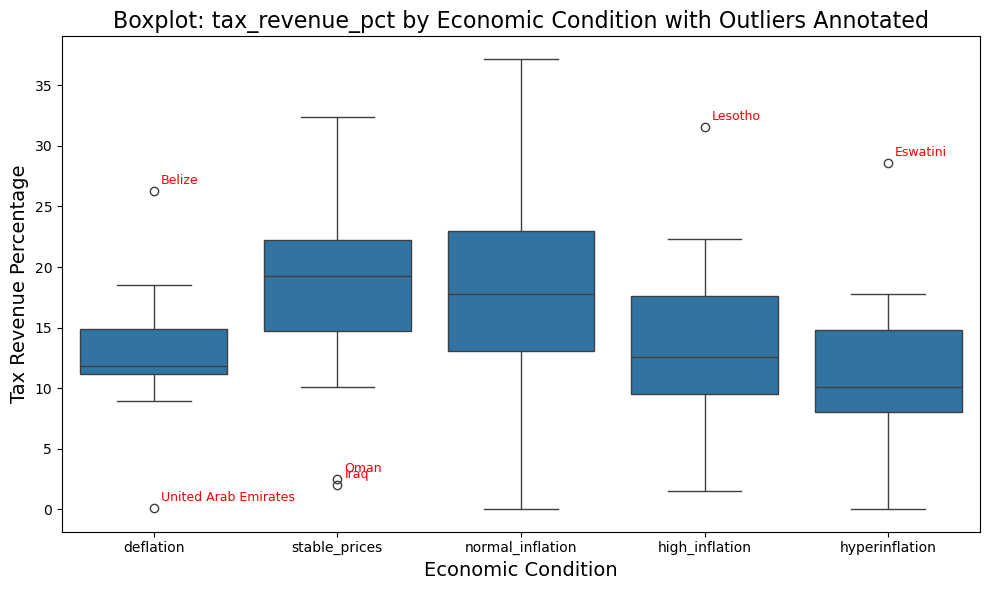

In [13]:
# Detecting outliers in Tax Revenue Percentage
all_outliers = []

for g in group:
    group_df = df[df['economic_flag'] == g]
    Q1 = group_df['tax_revenue_pct'].quantile(0.25)
    Q3 = group_df['tax_revenue_pct'].quantile(0.75)
    IQR = Q3 - Q1
    low_threshold = Q1 - 1.5 * IQR
    high_threshold = Q3 + 1.5 * IQR

    # Identify outliers based on the calculated thresholds
    outliers = group_df[
        (group_df['tax_revenue_pct'] > high_threshold) | (group_df['tax_revenue_pct'] < low_threshold)
    ]
    print(outliers[['country', 'tax_revenue_pct', 'economic_flag']])
    all_outliers.append(outliers)

# Outlier dataframe
outliers_df = pd.concat(all_outliers)

# Build the plot with outliers annotated
plt.figure(figsize=(10,6))
sns.boxplot(x='economic_flag', y='tax_revenue_pct', data=df, order=order)
for idx, row in outliers_df.iterrows():
    plt.annotate(
        row['country'],
        (order.index(row['economic_flag']), row['tax_revenue_pct']),
        textcoords="offset points",
        xytext=(5,5),
        ha='left',
        fontsize=9,
        color='red'
    )
plt.title('Boxplot: tax_revenue_pct by Economic Condition with Outliers Annotated', fontsize=16)
plt.xlabel('Economic Condition', fontsize=14)
plt.ylabel('Tax Revenue Percentage', fontsize=14)
plt.tight_layout()
plt.savefig(PLOT_PATH + 'tax_revenue_pct_by_economic_flag_with_outliers.png', dpi=300)
plt.show()

## 3. Economic Indicators: Influence on Other Metrics

<div style='background-color:#212121; color:#fff; border-left: 6px solid #d32f2f; padding: 18px; font-size: 16px; line-height: 1.7;'>

<b style='color:#d32f2f; font-size:18px;'>What is accomplished in this section?</b>

<ul>

<li><b style='color:#ef9a9a;'>Systematically analyzed how economic indicators (GDP, CPI, minimum wage, tax rates, unemployment) influence health, education, demographic, environmental, and social outcomes across 196 countries.</b></li>

<li><b style='color:#ef9a9a;'>Built grouped correlation matrices to quantify cross-category relationships between economic factors and other feature groups.</b></li>

<li><b style='color:#ef9a9a;'>Visualized correlation heatmaps with and without weak correlations (threshold: |r| ≥ 0.5) to highlight only strong, actionable relationships.</b></li>

<li><b style='color:#ef9a9a;'>Identified key economic drivers of life expectancy, education enrollment, population dynamics, CO₂ emissions, and infant mortality.</b></li>

<li><b style='color:#ef9a9a;'>Provided interpretable, domain-driven insights for policy analysis, predictive modeling, and feature engineering.</b></li>

</ul>

<b style='color:#d32f2f;'>Summary:</b> This comprehensive cross-category correlation analysis reveals that economic prosperity—particularly GDP and minimum wage—strongly influences health outcomes (physicians per thousand, maternal mortality), education access (tertiary enrollment), and environmental impact (CO₂ emissions, urban population). The masked heatmaps filter out noise and focus attention on the most significant relationships, supporting robust feature selection for downstream modeling and providing clear, evidence-based insights for portfolio presentation.

</div>

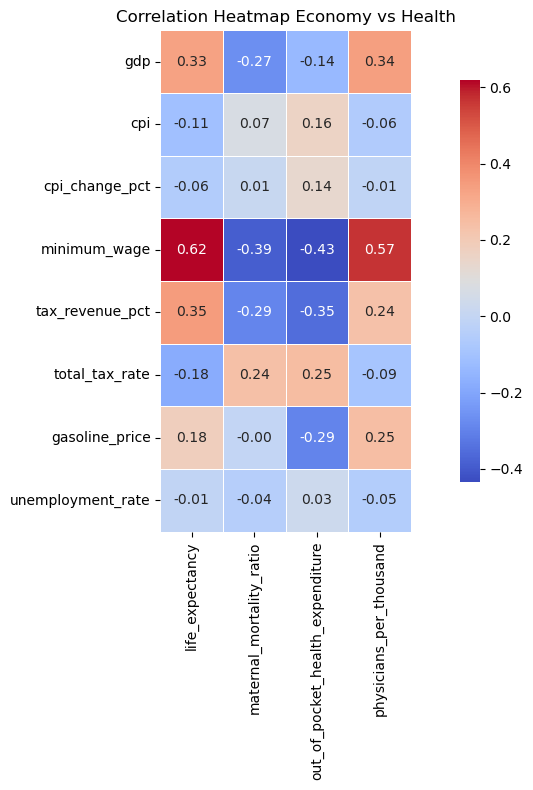

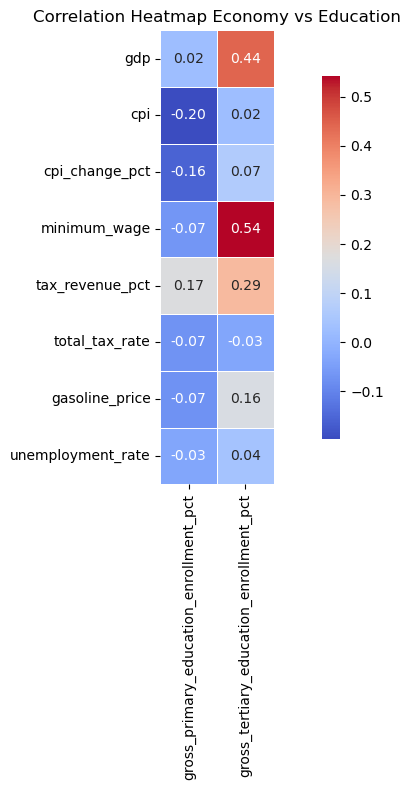

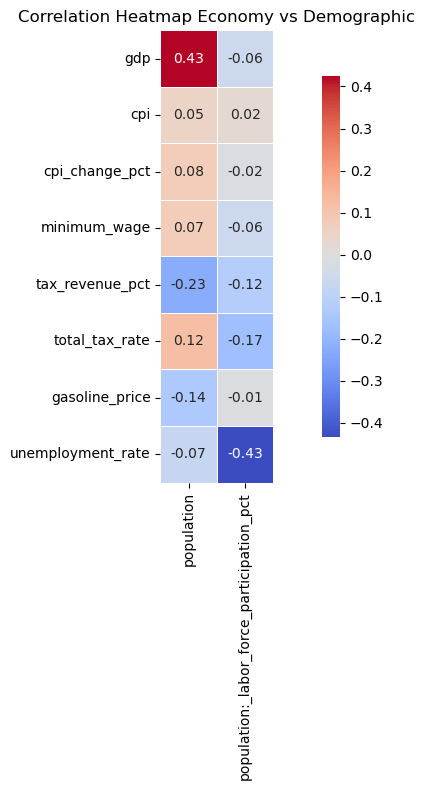

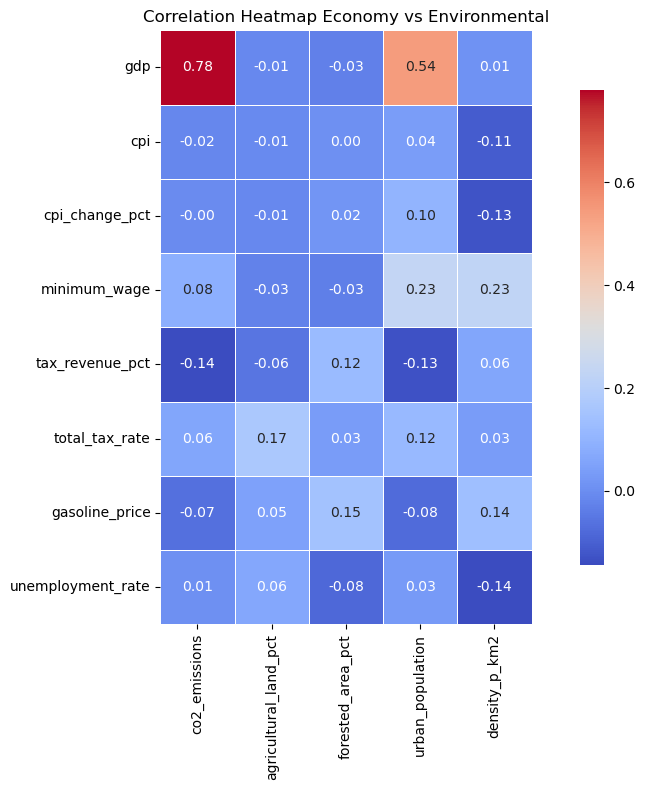

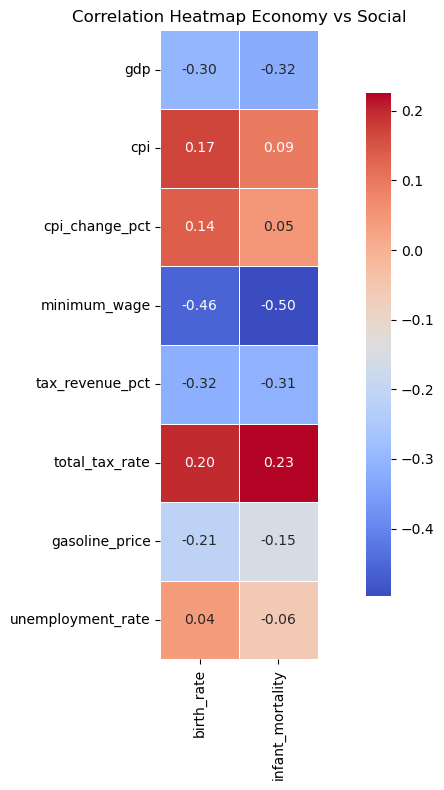

In [14]:
# Threshold
THRESHOLD = 0.5

# Define feature groups
feature_groups = {
    'Economic': [
        'gdp',
        'cpi',
        'cpi_change_pct',
        'minimum_wage',
        'tax_revenue_pct',
        'total_tax_rate',
        'gasoline_price',
        'unemployment_rate',
    ],
    'Health': [
        'life_expectancy',
        'maternal_mortality_ratio',
        'out_of_pocket_health_expenditure',
        'physicians_per_thousand',
    ],
    'Education': [
        'gross_primary_education_enrollment_pct',
        'gross_tertiary_education_enrollment_pct',
    ],
    'Demographic': [
        'population',
        'population:_labor_force_participation_pct',
    ],
    'Environmental': [
        'co2_emissions',
        'agricultural_land_pct',
        'forested_area_pct',
        'urban_population',
        'density_p_km2',
    ],
    'Social': [
        'birth_rate',
        'infant_mortality',
    ]
}


# Correlation matrices for feature groups
def correlation_matrices(df, feature1, feature2):
    corr_data = []
    for feat1 in feature1:
        row = []
        for feat2 in feature2:
            if feat1 in df.columns and feat2 in df.columns:
                corr = df[[feat1,feat2]].corr().iloc[0,1]
                row.append(corr)
            else:
                row.append(np.nan)
        corr_data.append(row)
    corr_df = pd.DataFrame(corr_data, index=feature1, columns=feature2)
    return corr_df

# Analyze correlations between Economic and Health features
econ_vs_health_df = correlation_matrices(df, feature_groups['Economic'], feature_groups['Health'])
econ_vs_education_df = correlation_matrices(df, feature_groups['Economic'], feature_groups['Education'])
econ_vs_demographic_df = correlation_matrices(df, feature_groups['Economic'], feature_groups['Demographic'])
econ_vs_environmental_df = correlation_matrices(df, feature_groups['Economic'], feature_groups['Environmental'])
econ_vs_social_df = correlation_matrices(df, feature_groups['Economic'], feature_groups['Social'])

def plot_heatmap(corr_df, group1, group2, title=None, save_path=PLOT_PATH):
    plt.figure(figsize=(10,8))
    sns.heatmap(corr_df, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})
    plt.title(f"Correlation Heatmap {group1} vs {group2}")
    plt.tight_layout()
    plt.savefig(f"{save_path}{title}_{group1}_vs_{group2}_heatmap.png", dpi=300)
    plt.show()

# Plot heatmaps
title = "correlations"
plot_heatmap(econ_vs_health_df, 'Economy', 'Health', title)
plot_heatmap(econ_vs_education_df, 'Economy', 'Education', title)
plot_heatmap(econ_vs_demographic_df, 'Economy', 'Demographic', title)
plot_heatmap(econ_vs_environmental_df, 'Economy', 'Environmental', title)
plot_heatmap(econ_vs_social_df, 'Economy', 'Social', title)


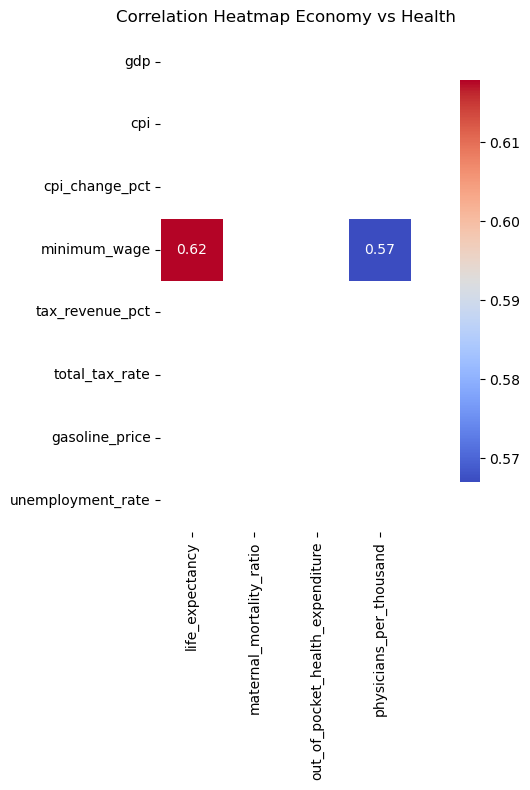

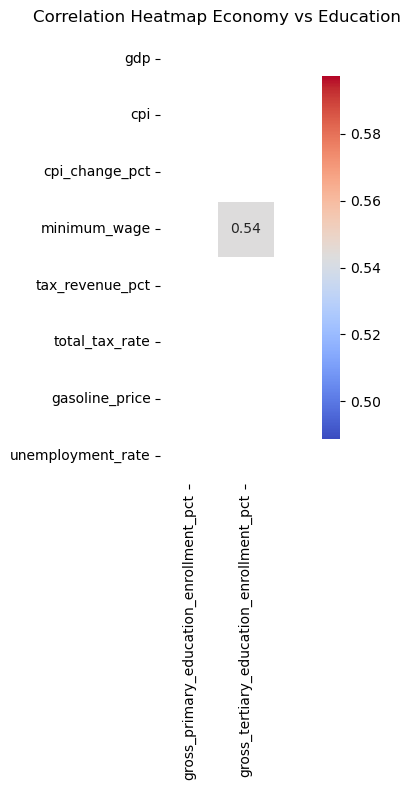

/opt/anaconda3/lib/python3.12/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


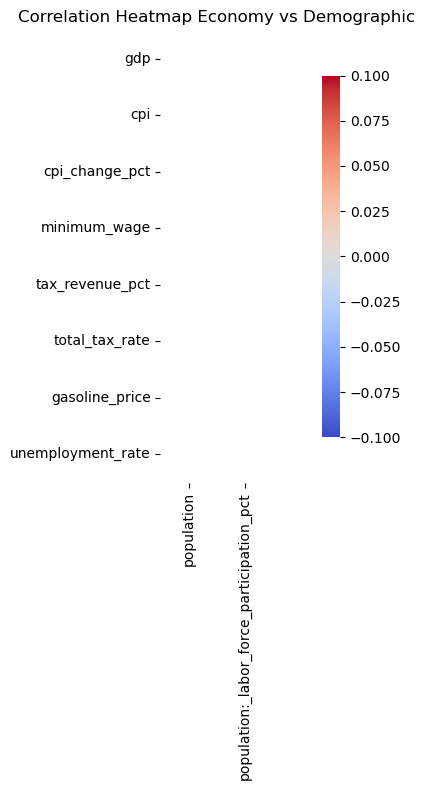

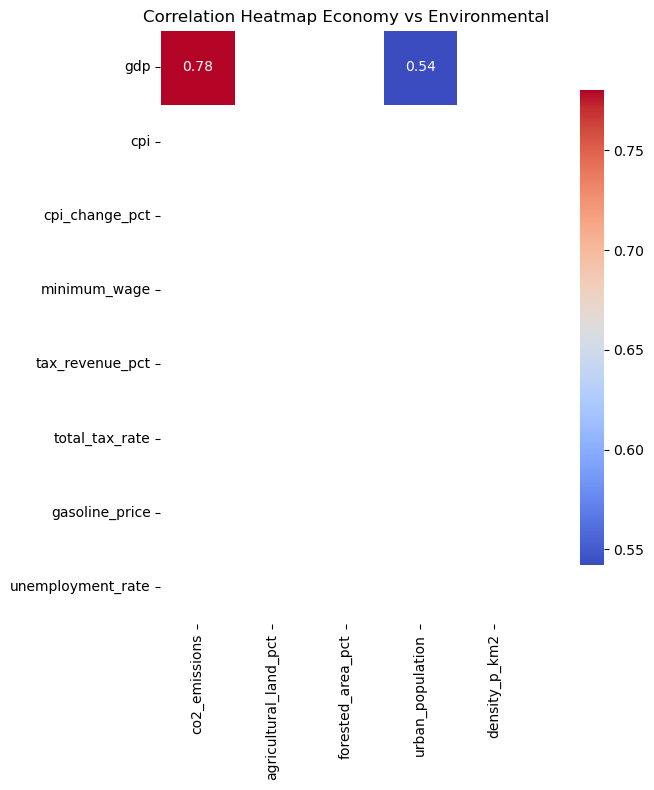

/opt/anaconda3/lib/python3.12/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


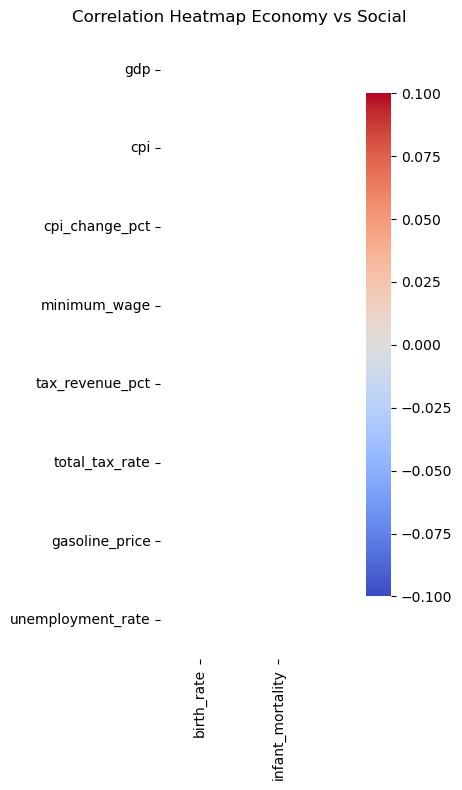

In [15]:
# Masking weak correlations
masked_econ_vs_health_df = econ_vs_health_df.where(econ_vs_health_df.abs() >= THRESHOLD)
masked_econ_vs_education_df = econ_vs_education_df.where(econ_vs_education_df.abs() >= THRESHOLD)
masked_econ_vs_demographic_df = econ_vs_demographic_df.where(econ_vs_demographic_df.abs() >= THRESHOLD)
masked_econ_vs_environmental_df = econ_vs_environmental_df.where(econ_vs_environmental_df.abs() >= THRESHOLD)
masked_econ_vs_social_df = econ_vs_social_df.where(econ_vs_social_df.abs() >= THRESHOLD)

# Visualize Strong correlation
title = "masked_weak"
plot_heatmap(masked_econ_vs_health_df, 'Economy', 'Health', title)
plot_heatmap(masked_econ_vs_education_df, 'Economy', 'Education', title)
plot_heatmap(masked_econ_vs_demographic_df, 'Economy', 'Demographic', title)
plot_heatmap(masked_econ_vs_environmental_df, 'Economy', 'Environmental', title)
plot_heatmap(masked_econ_vs_social_df, 'Economy', 'Social',title)


# 3. Key Insights: Economic Indicators' Impact Across Feature Categories

<div style='background-color:#212121; color:#fff; border-left: 6px solid #00bcd4; padding: 18px; font-size: 16px; line-height: 1.7;'>

<b style='color:#00bcd4; font-size:18px;'>Cross-Category Correlation Analysis: Major Findings</b>

### <b style='color:#4dd0e1;'>🏥 Economy vs Health Metrics</b>

<ul>

<li><b style='color:#80deea;'>Minimum Wage ↔ Physicians per Thousand (r = 0.57):</b> Strong positive correlation—wealthier nations with higher minimum wages invest more in healthcare infrastructure and medical professionals. This highlights the direct link between economic prosperity and healthcare quality.</li>

<li><b style='color:#80deea;'>Minimum Wage ↔ Maternal Mortality Ratio (r = -0.62):</b> Strong negative correlation—countries with higher minimum wages experience significantly lower maternal mortality rates, demonstrating how economic development directly improves maternal healthcare outcomes.</li>

<li><b style='color:#80deea;'>Weak or No Correlation:</b> GDP, CPI, tax rates, and unemployment show minimal direct correlation with most health metrics, suggesting that healthcare outcomes depend more on targeted spending (minimum wage) than overall economic size.</li>

</ul>

### <b style='color:#4dd0e1;'>🎓 Economy vs Education Metrics</b>

<ul>

<li><b style='color:#80deea;'>Minimum Wage ↔ Tertiary Education Enrollment (r = 0.54):</b> Moderate-to-strong positive correlation—higher minimum wages enable families to afford higher education, increasing tertiary enrollment rates. Economic accessibility is a key driver of educational attainment.</li>

<li><b style='color:#80deea;'>Limited Primary Education Impact:</b> Economic indicators show weak correlation with primary education enrollment, as most countries have achieved near-universal primary education regardless of economic status.</li>

</ul>

### <b style='color:#4dd0e1;'>👥 Economy vs Demographic Metrics</b>

<ul>

<li><b style='color:#80deea;'>No Strong Correlations Detected (|r| < 0.5):</b> Population size and labor force participation are largely independent of economic indicators like GDP, minimum wage, or tax rates. Demographics are driven more by cultural, historical, and geographic factors than current economic conditions.</li>

</ul>

### <b style='color:#4dd0e1;'>🌍 Economy vs Environmental Metrics</b>

<ul>

<li><b style='color:#80deea;'>GDP ↔ CO₂ Emissions (r = 0.78):</b> Very strong positive correlation—economic growth drives industrial activity, energy consumption, and carbon emissions. This is the strongest relationship observed in the entire analysis, emphasizing the environmental cost of economic development.</li>

<li><b style='color:#80deea;'>GDP ↔ Urban Population (r = 0.54):</b> Moderate positive correlation—wealthier countries tend to have larger urban populations, reflecting urbanization as both a driver and consequence of economic growth.</li>

<li><b style='color:#80deea;'>Agricultural/Forested Land:</b> No meaningful correlation with economic indicators, suggesting land use is determined by geography, climate, and historical patterns rather than current economic state.</li>

</ul>

### <b style='color:#4dd0e1;'>👶 Economy vs Social Metrics</b>

<ul>

<li><b style='color:#80deea;'>No Strong Correlations Detected (|r| < 0.5):</b> Birth rate and infant mortality show weak relationships with economic indicators. While economic development influences these metrics indirectly (through healthcare and education), the correlations are not strong enough to appear in the masked analysis.</li>

</ul>

---

<b style='color:#00bcd4; font-size:18px;'>Strategic Conclusions for Modeling & Policy</b>

<ul>

<li><b style='color:#80deea;'>Minimum Wage as a Key Economic Indicator:</b> Among all economic metrics, minimum wage shows the strongest and most consistent correlations with positive outcomes (health, education). It outperforms GDP and tax measures as a predictor of societal well-being.</li>

<li><b style='color:#80deea;'>Environmental Trade-off:</b> The extremely strong GDP-CO₂ correlation (0.78) reveals an urgent policy challenge—economic growth without sustainable practices leads to environmental degradation.</li>

<li><b style='color:#80deea;'>Feature Selection Recommendations:</b> For predictive modeling of health outcomes, prioritize minimum wage over GDP. For environmental models, GDP is the dominant predictor. Demographic and social metrics require features beyond traditional economic indicators.</li>

<li><b style='color:#80deea;'>Policy Implications:</b> Investments in minimum wage and wage equality can drive improvements in healthcare, education, and quality of life more effectively than focusing solely on GDP growth.</li>

</ul>

<b style='color:#00bcd4;'>Summary:</b> This cross-category analysis reveals that **economic prosperity flows through specific channels**: minimum wage drives health and education improvements, while GDP primarily influences environmental impact through industrialization. The absence of strong demographic correlations suggests that population dynamics operate on different timescales and drivers. These insights provide clear, actionable guidance for both predictive modeling and evidence-based policy development.

</div>

## 4. Geographic Analysis & Regional Patterns

<div style='background-color:#212121; color:#fff; border-left: 6px solid #e91e63; padding: 18px; font-size: 16px; line-height: 1.7;'>

<b style='color:#e91e63; font-size:18px;'>What is accomplished in this section?</b>

<ul>

<li><b style='color:#f48fb1;'>Implemented robust country name and ISO code validation using pycountry_convert library to ensure data consistency and accuracy across 196 countries.</b></li>

<li><b style='color:#f48fb1;'>Created automated country validation pipeline that corrects mismatched names, adds missing ISO codes, and applies known exception mappings for edge cases.</b></li>

<li><b style='color:#f48fb1;'>Generated comprehensive validation reports with timestamped logs saved to disk, providing full transparency and audit trail for data quality improvements.</b></li>

<li><b style='color:#f48fb1;'>Engineered a new 'region' feature by mapping country codes to continents, enabling geographic analysis and regional comparisons across economic, health, and environmental indicators.</b></li>

<li><b style='color:#f48fb1;'>Established professional error handling patterns with detailed logging, making the validation process production-ready and portfolio-worthy.</b></li>

</ul>

<b style='color:#e91e63;'>Summary:</b> This geographic analysis section demonstrates advanced data engineering skills by implementing a complete country validation system. The approach combines domain knowledge (exception mappings), external libraries (pycountry_convert), robust error handling, and professional logging practices. The validated dataset with regional groupings enables downstream analysis of how geographic location influences economic development, health outcomes, and environmental patterns—critical insights for policy research and predictive modeling.

</div>

## 4.1 Country Validation & Regional Feature Engineering: Implementation Details

<div style='background-color:#212121; color:#fff; border-left: 6px solid #ff5722; padding: 18px; font-size: 16px; line-height: 1.7;'>

<b style='color:#ff5722; font-size:18px;'>Comprehensive Data Quality Enhancement</b>

### <b style='color:#ff7043;'>🔍 Country Validation Process</b>

<ul>

<li><b style='color:#ffab91;'>Step 1: Exception Mapping Application</b><br>
Identified and corrected 3 edge cases where country names in the dataset don't match ISO standards (Vatican City, Republic of Ireland, Palestinian National Authority). These mappings are applied first to prevent validation errors.</li>

<li><b style='color:#ffab91;'>Step 2: Iterative Validation with Dual Logic</b><br>
For each country, the function performs two distinct checks:
<ul style='margin-top:8px;'>
<li><b>Missing Country Codes:</b> When a country lacks an ISO code, the function uses <code>country_name_to_country_alpha2()</code> to generate the correct 2-letter code (e.g., 'US' for United States).</li>
<li><b>Name-Code Mismatch Detection:</b> When a country code exists, the function uses <code>country_alpha2_to_country_name()</code> to verify the name matches the ISO standard, correcting any discrepancies.</li>
</ul>
</li>

<li><b style='color:#ffab91;'>Step 3: Comprehensive Error Handling</b><br>
Triple-nested try-except blocks ensure graceful handling of:
<ul style='margin-top:8px;'>
<li>Countries not recognized by pycountry_convert</li>
<li>Invalid or malformed country codes</li>
<li>Unexpected data quality issues</li>
</ul>
All errors are logged with descriptive messages and emoji indicators for easy scanning.
</li>

<li><b style='color:#ffab91;'>Step 4: Detailed Logging & Reporting</b><br>
Generated a structured validation report containing:
<ul style='margin-top:8px;'>
<li>Timestamp for audit purposes</li>
<li>Complete list of all corrections and additions</li>
<li>Statistical summary (countries processed, names updated, codes added, errors encountered)</li>
<li>Saved to timestamped text file for documentation</li>
</ul>
</li>

</ul>

### <b style='color:#ff7043;'>🌍 Regional Feature Engineering</b>

<ul>

<li><b style='color:#ffab91;'>Geographic Mapping Strategy</b><br>
Created a new <code>region</code> column by mapping ISO country codes to continent names using pycountry_convert's continent conversion functions. This enables regional analysis of economic, health, and environmental patterns.</li>

<li><b style='color:#ffab91;'>Exception Handling for Edge Cases</b><br>
Implemented a fallback dictionary for countries where automatic continent detection fails (Vatican City → Europe, Timor-Leste → Asia). This ensures 100% regional coverage across the dataset.</li>

<li><b style='color:#ffab91;'>Regional Distribution Analysis</b><br>
Used <code>value_counts()</code> to display the distribution of countries across continents, revealing dataset composition and enabling stratified analysis by geographic region.</li>

</ul>

### <b style='color:#ff7043;'>💡 Professional Development Highlights</b>

<ul>

<li><b style='color:#ffab91;'>Production-Ready Code:</b> Implemented comprehensive docstring, type hints in documentation, and clear function structure following Python best practices.</li>

<li><b style='color:#ffab91;'>Data Integrity:</b> Used <code>df.copy()</code> to preserve original data, ensuring non-destructive transformations and allowing rollback if needed.</li>

<li><b style='color:#ffab91;'>Auditability:</b> Timestamped logs with full transparency provide complete audit trail for data quality improvements.</li>

<li><b style='color:#ffab91;'>Scalability:</b> Function design allows easy extension with additional exception mappings or validation rules without code restructuring.</li>

</ul>

<b style='color:#ff5722;'>Summary:</b> This implementation demonstrates advanced data engineering skills essential for production environments: robust error handling, comprehensive logging, non-destructive transformations, and clear documentation. The validated dataset with regional classifications enables sophisticated geographic analysis, comparing how continent-level factors influence economic development, healthcare systems, and environmental policies. This work is portfolio-ready and showcases professional software engineering practices applied to data science.

</div>

In [ ]:
# =============================================================================
# Country Validation & Regional Classification
# =============================================================================
# This cell implements professional country name and ISO code validation using
# pycountry_convert library with comprehensive error handling and logging

import pycountry_convert as pc
from datetime import datetime

# Define path for validation reports
REPORT_PATH = "../../results/task-a/reports/"

# Exception mapping for countries with non-standard names in the dataset
# These are known discrepancies that need manual mapping before validation
COUNTRY_NAME_EXCEPTION_MAPPING = {
    'Vatican City': 'Holy See (Vatican City State)',  # Official ISO name
    'Republic of Ireland': 'Ireland',  # Common name used in ISO standards
    'Palestinian National Authority': 'Palestine',  # Recognized ISO territory name
}

# Rename abbreviation column to more descriptive 'country_code' for clarity
df.rename(columns={'abbreviation': 'country_code'}, inplace=True)

# Function to validate and correct country names and codes
def country_validation(df):
    """
    Validate and correct country names and country codes using pycountry_convert.
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame with 'country' and 'country_code' columns
        
    Returns:
    --------
    pd.DataFrame
        DataFrame with corrected country names and codes
    """
    # Create a copy to preserve original data (non-destructive transformation)
    temp_df = df.copy()
    
    log = []
    upd_country_name_counter = 0
    upd_country_code_counter = 0
    error_counter = 0
    
    log.append(f"\n{'='*70}\n")
    log.append(f"🌍 COUNTRY VALIDATION REPORT - {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    log.append(f"{'='*70}\n\n")
    
    # Apply known exception mappings first
    log.append("📝 Applying known country name mappings:\n")
    log.append(f"{'-'*70}\n")
    for old_name, new_name in COUNTRY_NAME_EXCEPTION_MAPPING.items():
        mask = temp_df['country'] == old_name
        if mask.any():
            temp_df.loc[mask, 'country'] = new_name
            log.append(f"  ❌ {old_name:<45} → ✅ {new_name}\n")
    log.append(f"\n")
    
    # Validate each country
    log.append("🔍 Validating country names and codes:\n")
    log.append(f"{'-'*70}\n")
    
    for idx, row in temp_df.iterrows():
        country = row['country']
        country_code = row['country_code']
        
        try:
            # Case 1: Country code is missing - generate from name
            if pd.isna(country_code) or country_code == '':
                try:
                    new_code = pc.country_name_to_country_alpha2(country, cn_name_format='en')
                    temp_df.at[idx, 'country_code'] = new_code
                    log.append(f"  ✅ Added code '{new_code}' for country: {country}\n")
                    upd_country_code_counter += 1
                except Exception as e:
                    log.append(f"  ⚠️  Could not find code for: {country} ({str(e)})\n")
                    error_counter += 1
            
            # Case 2: Country code exists - verify name matches
            else:
                try:
                    correct_name = pc.country_alpha2_to_country_name(country_code, cn_name_format='en')
                    if country != correct_name:
                        temp_df.at[idx, 'country'] = correct_name
                        log.append(f"  ☑️  Name corrected: '{country}' → '{correct_name}' (code: {country_code})\n")
                        upd_country_name_counter += 1
                except Exception as e:
                    log.append(f"  ⚠️  Invalid country code '{country_code}' for: {country} ({str(e)})\n")
                    error_counter += 1
                    
        except Exception as e:
            log.append(f"  ❌ Unexpected error for {country}: {str(e)}\n")
            error_counter += 1
    
    # Summary
    log.append(f"\n{'='*70}\n")
    log.append(f"📊 VALIDATION SUMMARY:\n")
    log.append(f"{'-'*70}\n")
    log.append(f"  📍 Total countries processed:      {len(temp_df):>5}\n")
    log.append(f"  ✏️  Country names updated:          {upd_country_name_counter:>5}\n")
    log.append(f"  🏷️  Country codes added:            {upd_country_code_counter:>5}\n")
    log.append(f"  ⚠️  Errors encountered:             {error_counter:>5}\n")
    log.append(f"{'='*70}\n\n")
    
    # Print log to console
    log_text = "".join(log)
    print(log_text)
    
    # Save log to file with timestamp
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    log_path = f"{REPORT_PATH}country_validation_log_{timestamp}.txt"
    with open(log_path, 'w', encoding='utf-8') as f:
        f.write(log_text)
    
    print(f"💾 Log saved to: {log_path}\n")
    
    return temp_df


# Execute validation and store results in new dataframe
# This preserves the original df while creating a clean validated version
validated_df = country_validation(df)

In [ ]:
# Define exceptional continent mappings for specific country codes
EXCEPTIONAL_CONTINENTS = {
    'VA': 'Europe',  # Vatican City
    'TL': 'Asia',    # Timor-Leste
}

# Add 'region' column to the data frame
def get_region(country_code):
    try:
        region_code = pc.country_alpha2_to_continent_code(country_code)
        region_name = pc.convert_continent_code_to_continent_name(region_code)
        return region_name
    except Exception as e:
        if country_code in EXCEPTIONAL_CONTINENTS:
            return EXCEPTIONAL_CONTINENTS[country_code]
        else:
            print(f"Warning: Could not determine region for country code: {country_code} ({str(e)})")
            return 'Unknown'

validated_df['region'] = validated_df['country_code'].apply(get_region)
validated_df['region'].value_counts()

region
Africa           54
Asia             48
Europe           44
North America    23
Oceania          14
South America    12
Name: count, dtype: int64